<a href="https://colab.research.google.com/github/rndbblnn/stonks-jupyter/blob/main/charting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
!pip install yfinance
!pip install mplfinance

import yfinance as yf
import mplfinance as mpf
import matplotlib.pyplot as plt
import matplotlib.image  as m_img
import pandas as pd
import numpy as np 
import json
import requests
import urllib.parse
import base64
import warnings
import logging
import io
from PIL import Image

warnings.filterwarnings('ignore')

baseurl = 'https://d7f2c3211135.ngrok.io';
class Direction:
    LONG = 1
    SHORT = 2

def encodeUrl(arg):
  str = arg.replace('.','%2E')
  return urllib.parse.quote(str)

#  create function to plot market and indexes
def plotPerformance(arg):
    df = arg
    df.info()
    
    #  plot #4
    plt.figure(figsize=(10,6))
    plt.plot(df[ticker])
    plt.title('SYMBOLS', fontsize = 14)
    plt.ylabel('percent change', fontsize = 14)
    plt.legend(df[ticker], loc="upper left", bbox_to_anchor=(1,1))
    plt.xticks(rotation = 90)
    plt.show()

dummyImg = Image.new('RGB', (60, 30), color = 'white')
dummyImg.save('dummy.png')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


array([[[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       ...,

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]],

       [[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.],
        ...,
        [1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]]], dtype=float32)

In [108]:
q = '\
[d]H.0 * 0.99 > [d]MAXH20.1 \n\
AND [d]C.0 < [d]O.0 \n\
AND [d]C.0 < [d]C.1 \n\
AND [d]C.1 < [d]AVGC50.0 \n\
AND [d]AVGC10.0 < [d]AVGC20.0 \n\
AND (\n\
    [d]DV.0 > 1.0 \n\
    OR [d]MINDV3.1 > 2.0\n\
    OR [d]AVGDV20.0 > 3.0\n\
)\n\
AND (\n\
    [d]ATR1.0 > 8.0 \n\
    OR [d]ATR20.0 > 5.0 \n\
    OR [d]ATR20.20 > 5.0 \n\
    OR [d]ATR20.40 > 5.0 \n\
)\
';

try:
  r = requests.post(baseurl + '/search', data={'q': q})
  df = pd.DataFrame(r.json()['payload'])
except Exception as e:
  logging.error(f"Exception Name: {type(e).__name__}")
  logging.error(f"Exception Desc: {e}")
  print(r)
  print(r.text)
  raise e

print(df.head)
df['patternTime'] = pd.to_datetime(df['patternTime'])

<bound method NDFrame.head of    symbol          patternTime
0    SKYH  2022-08-10T00:00:00
1    LIAN  2022-08-09T00:00:00
2    EDBL  2022-08-03T00:00:00
3     WLK  2022-08-02T00:00:00
4    IMPP  2022-07-27T00:00:00
5     FAS  2022-07-22T00:00:00
6    ILMN  2022-07-22T00:00:00
7    LPRO  2022-07-22T00:00:00
8    NTNX  2022-07-22T00:00:00
9     HKD  2022-07-19T00:00:00
10   KLIC  2022-07-18T00:00:00
11   NTCO  2022-07-18T00:00:00
12   PLTK  2022-06-28T00:00:00
13   COOK  2022-06-27T00:00:00
14   REAL  2022-06-27T00:00:00
15   ENTA  2022-06-24T00:00:00
16   JZXN  2022-06-23T00:00:00
17   PRTY  2022-06-21T00:00:00
18   AKAN  2022-06-17T00:00:00
19   MCRB  2022-06-08T00:00:00
20    LEA  2022-05-20T00:00:00
21   SEMR  2022-05-20T00:00:00
22   HOLI  2022-05-17T00:00:00
23   EVAX  2022-05-10T00:00:00
24   SMFL  2022-05-10T00:00:00
25   TPIC  2022-05-06T00:00:00
26   AUST  2022-05-04T00:00:00
27   BASE  2022-04-29T00:00:00
28   FBHS  2022-04-29T00:00:00
29    DRV  2022-04-28T00:00:00
30   DSEY

SKYH (2022-08-10)
 open  high  low  close  volume
 5.14  6.06 4.23   4.35 1028860


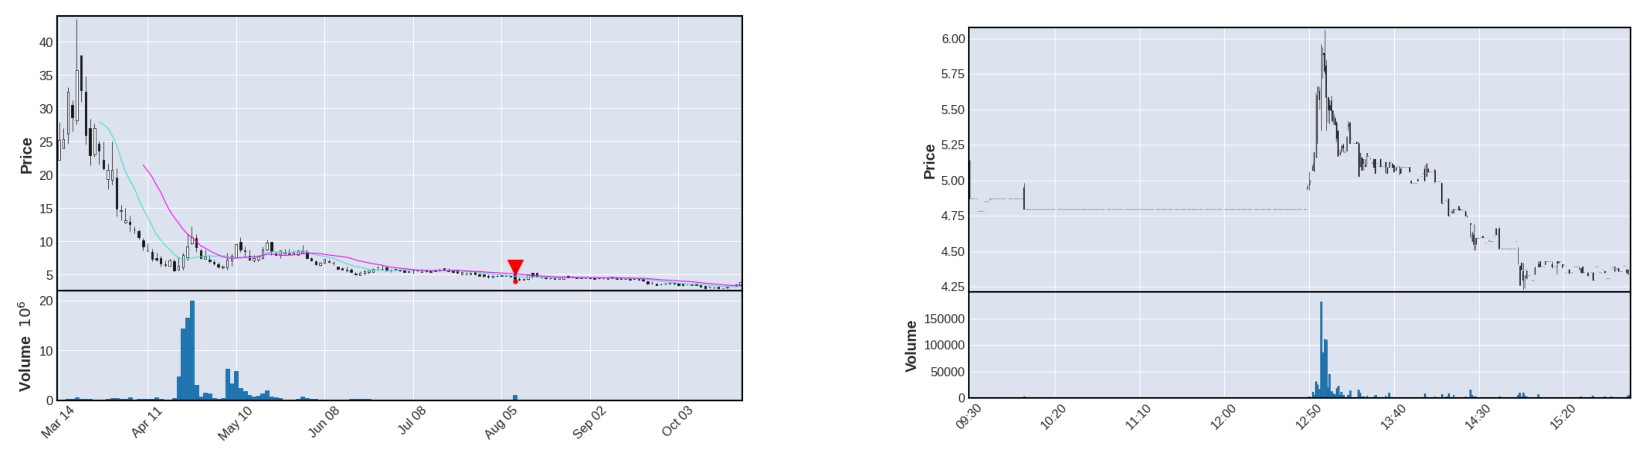

LIAN (2022-08-09)
 open  high  low  close  volume
 2.53  3.08 2.39    2.4  940505


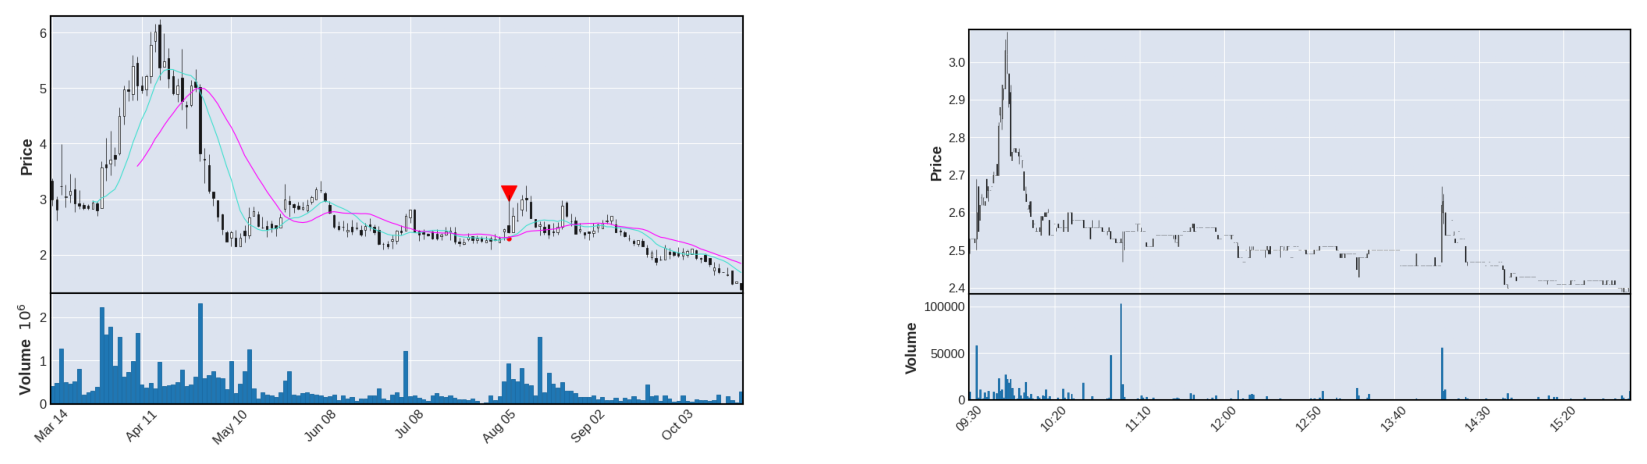

EDBL (2022-08-03)
 open  high  low  close  volume
  1.4  1.59 1.27   1.35  754410


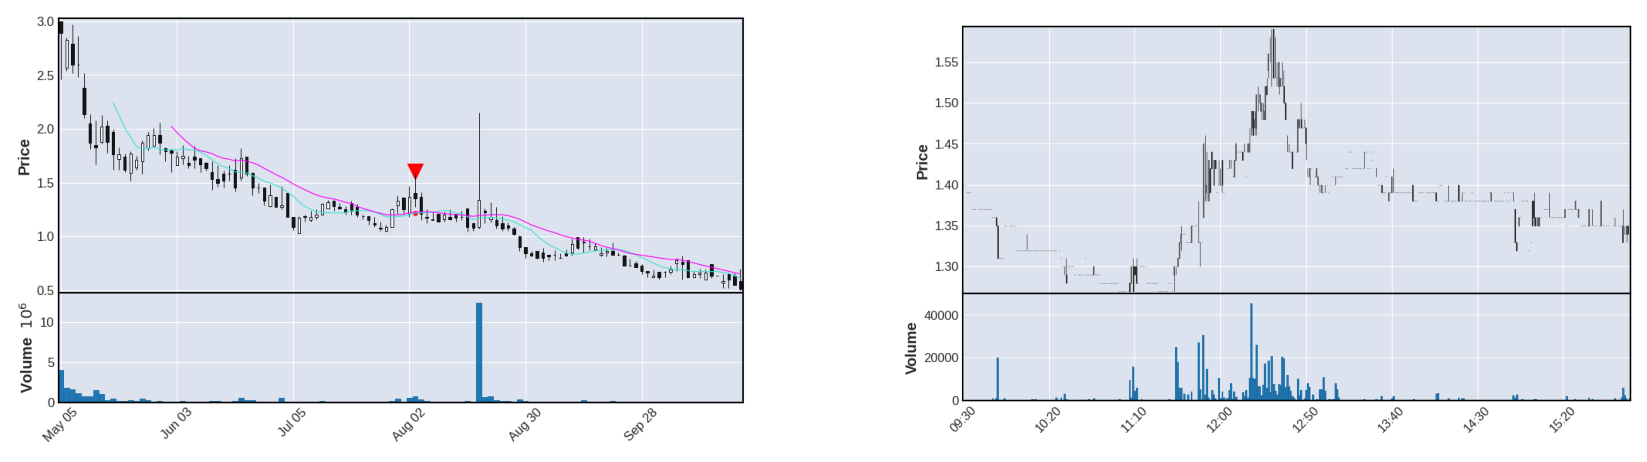

WLK (2022-08-02)
 open  high   low  close  volume
98.25 100.8 92.63  94.44  786204


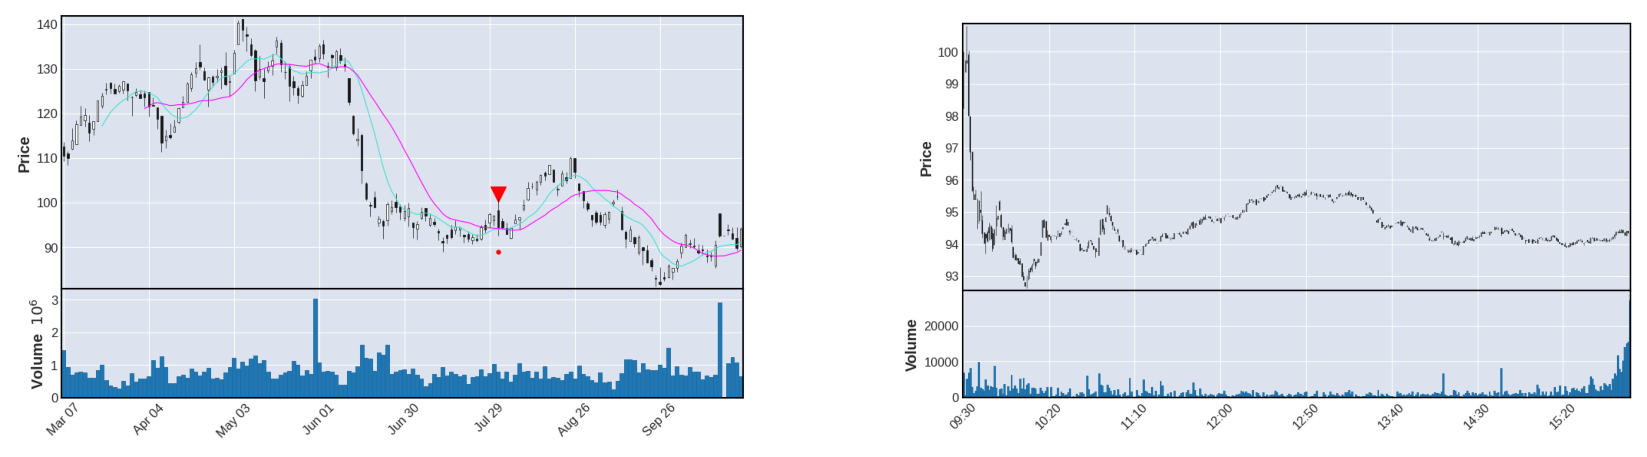

IMPP (2022-07-27)
 open  high  low  close   volume
 0.58  0.59 0.43   0.44 74316123


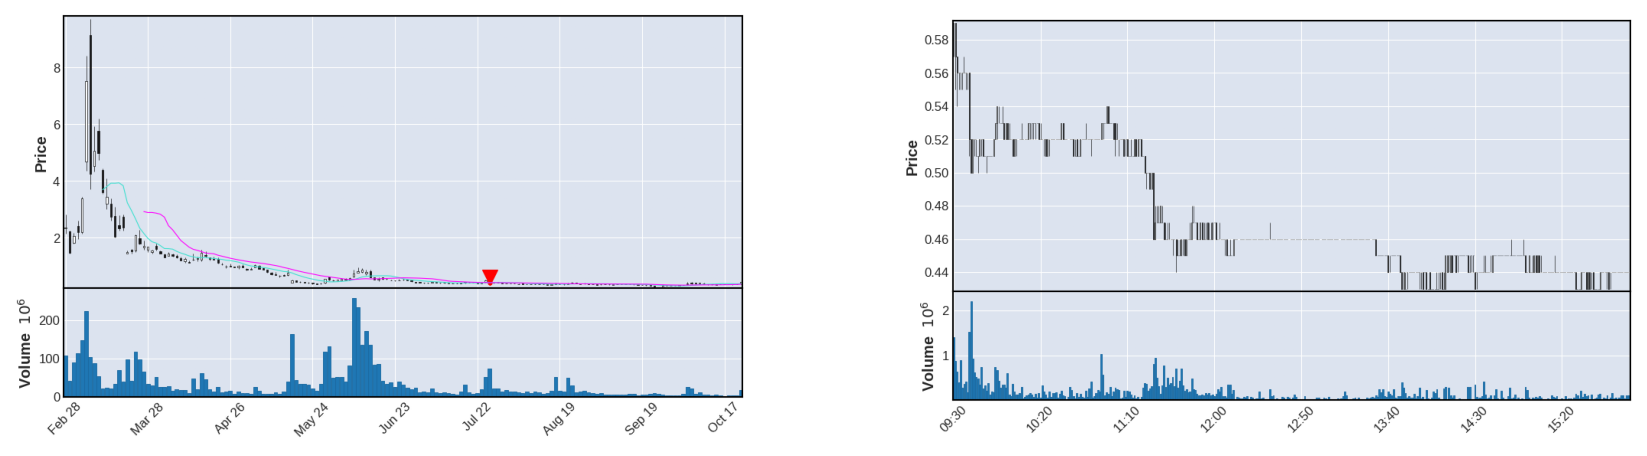

FAS (2022-07-22)
 open  high   low  close  volume
71.48 72.73 68.44  69.89 1046319


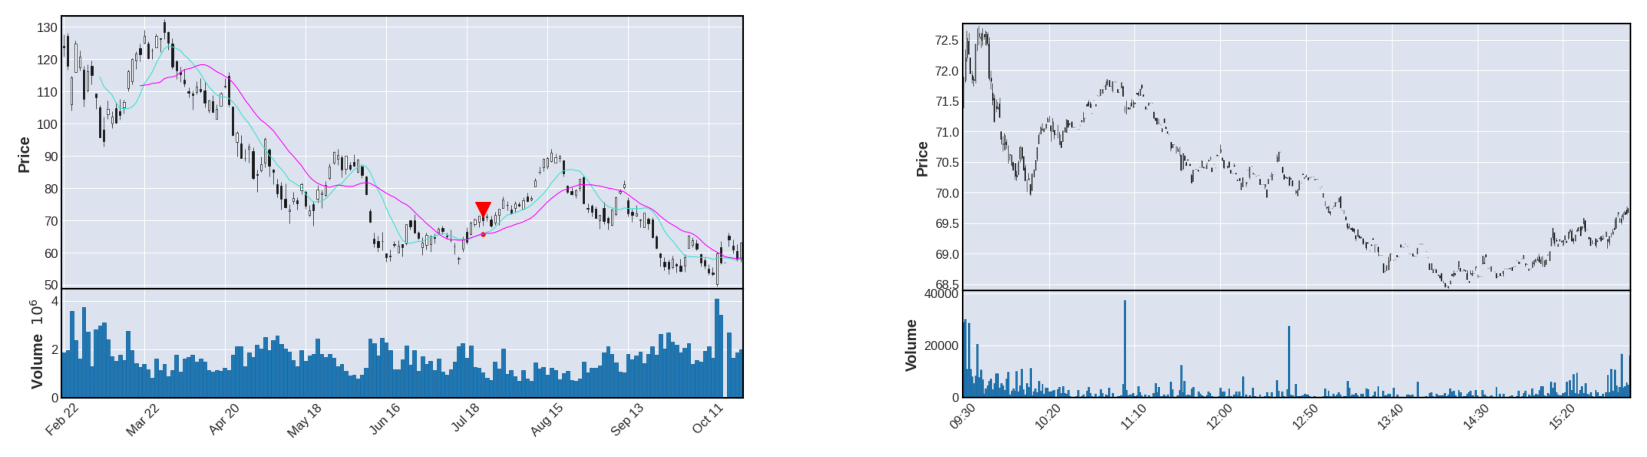

ILMN (2022-07-22)
  open   high   low  close  volume
208.75 211.58 200.5 201.69  885139


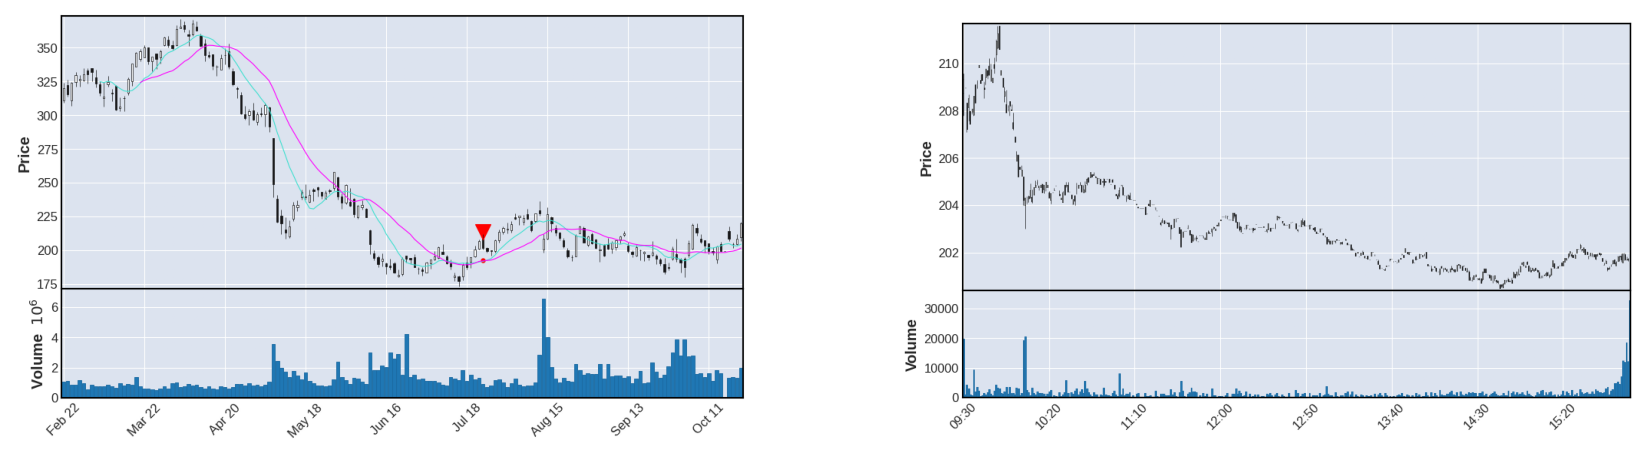

LPRO (2022-07-22)
 open  high   low  close  volume
11.12  11.4 10.95  11.05  703842


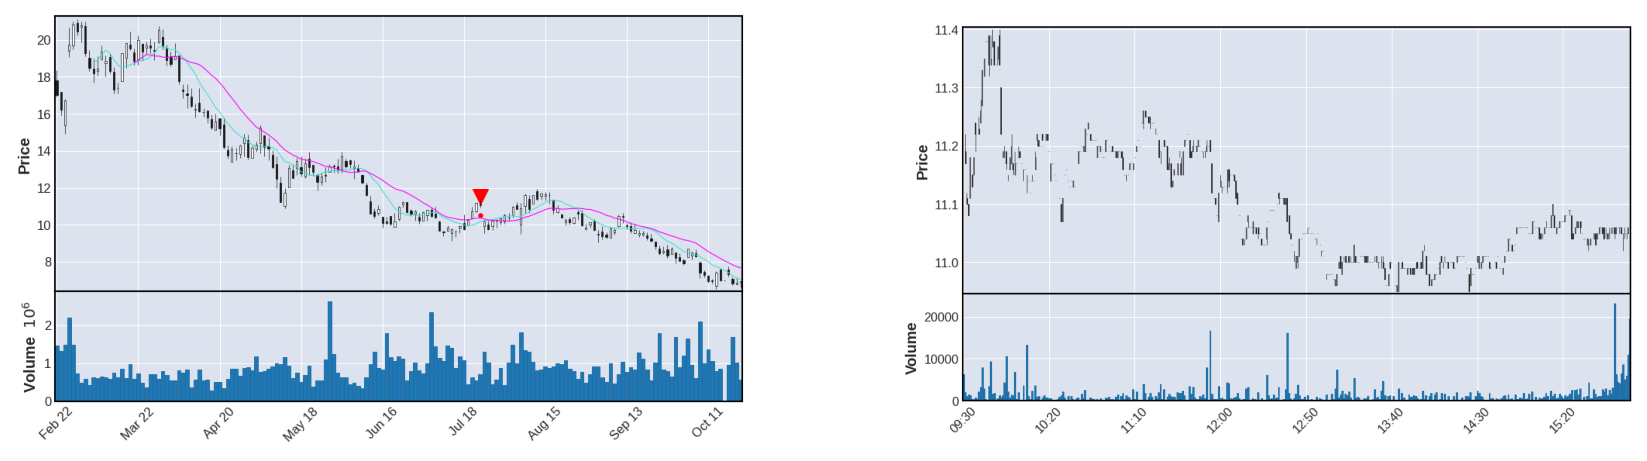

NTNX (2022-07-22)
 open  high   low  close  volume
15.75 16.08 14.99  15.05 1442139


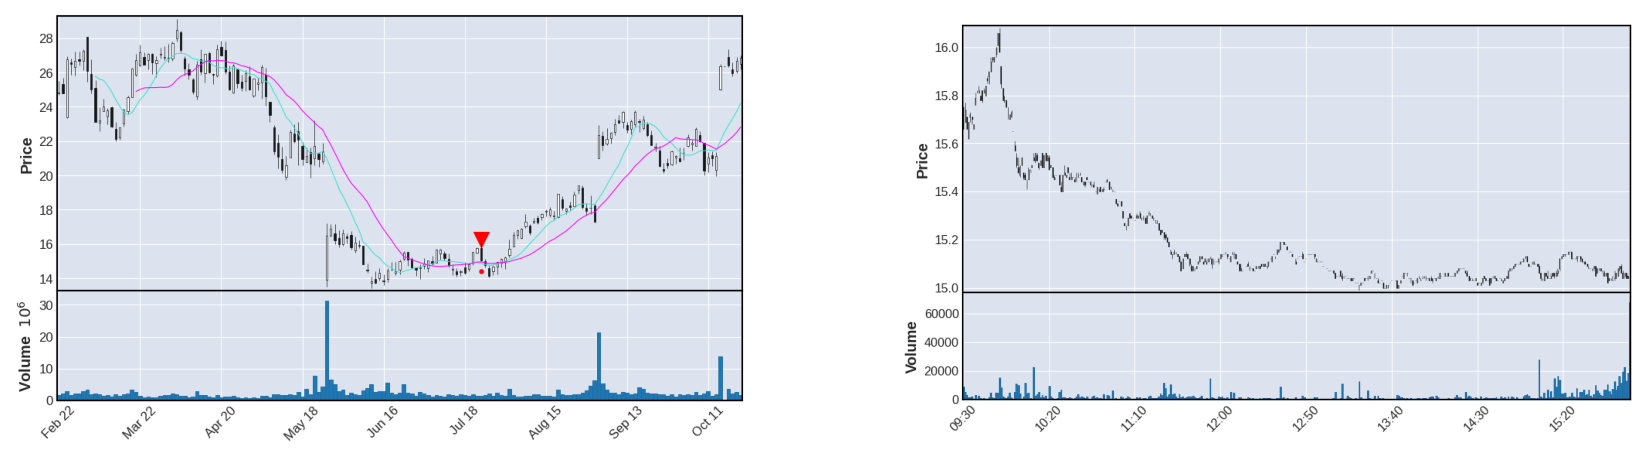

HKD (2022-07-19)
 open  high   low  close  volume
31.74 33.03 13.52  24.88 2265395


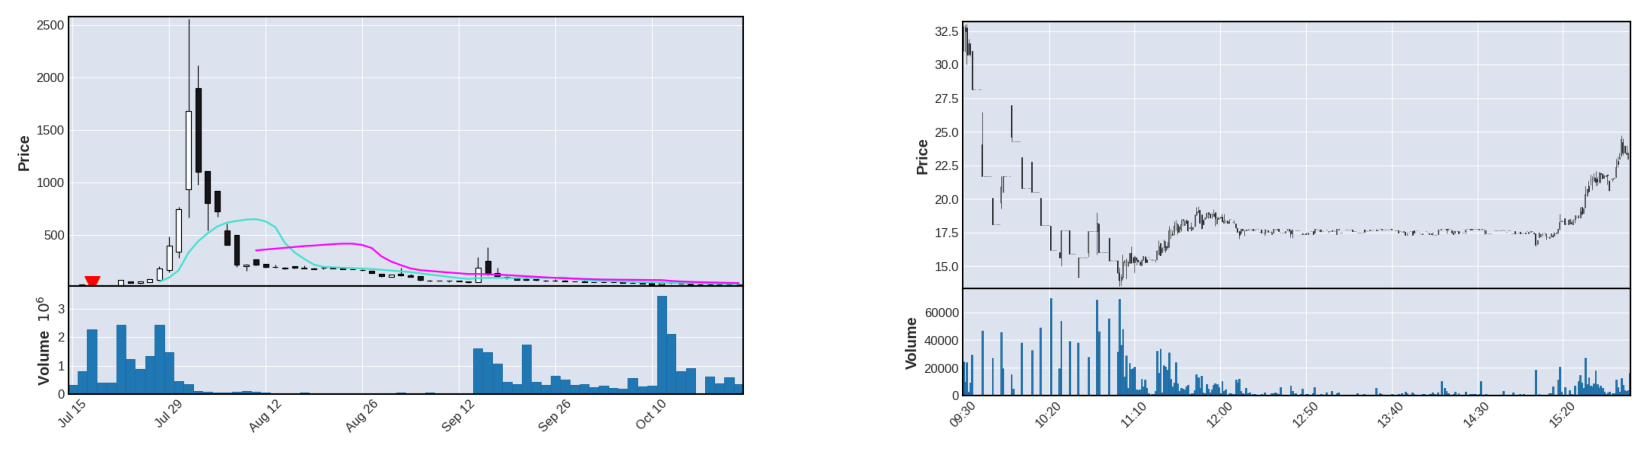

KLIC (2022-07-18)
 open  high   low  close  volume
45.87  47.1 44.78  45.17  841267


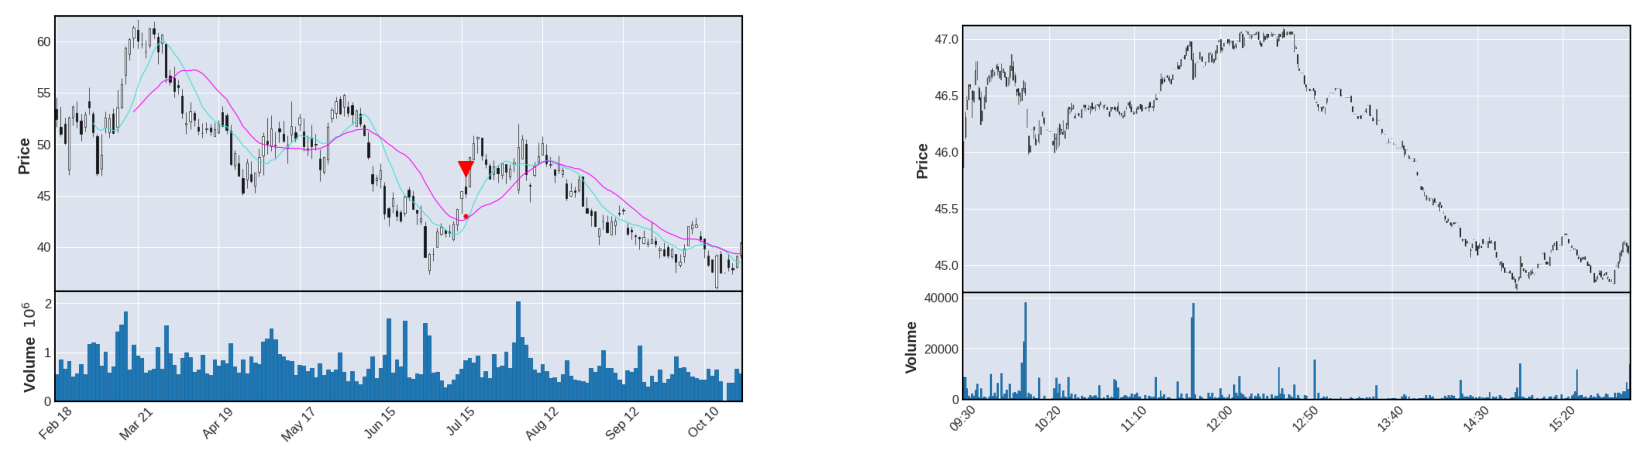

NTCO (2022-07-18)
 open  high  low  close  volume
 5.87  6.09 5.73   5.77  900301


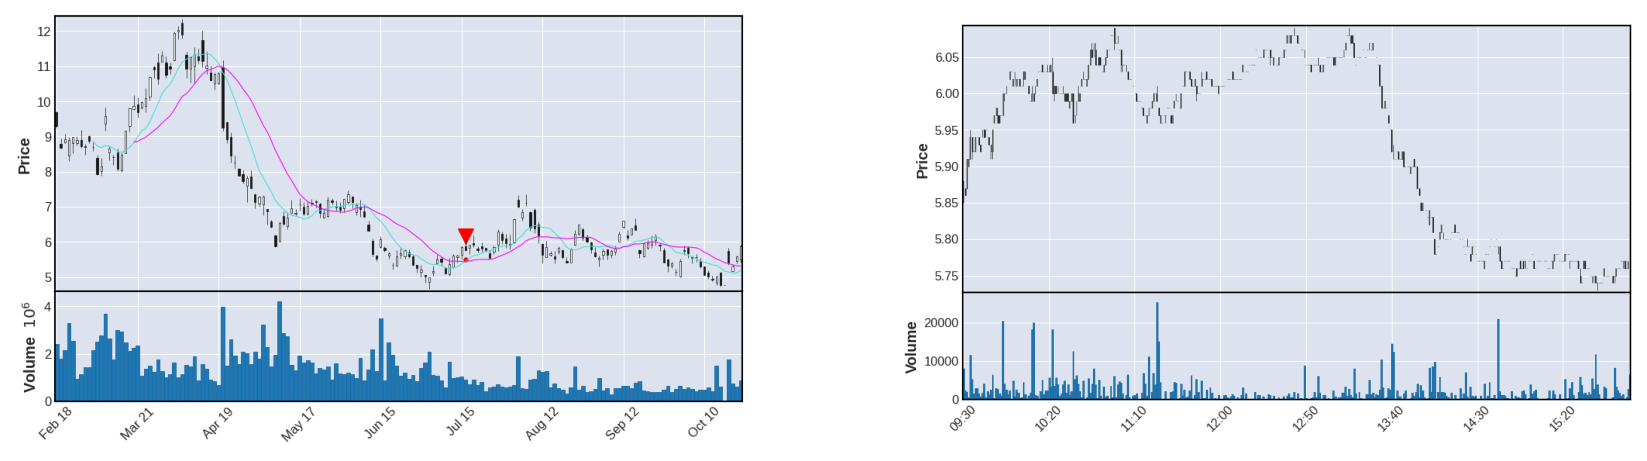

PLTK (2022-06-28)
 open  high   low  close  volume
15.61 15.61 13.11  13.15 7622915


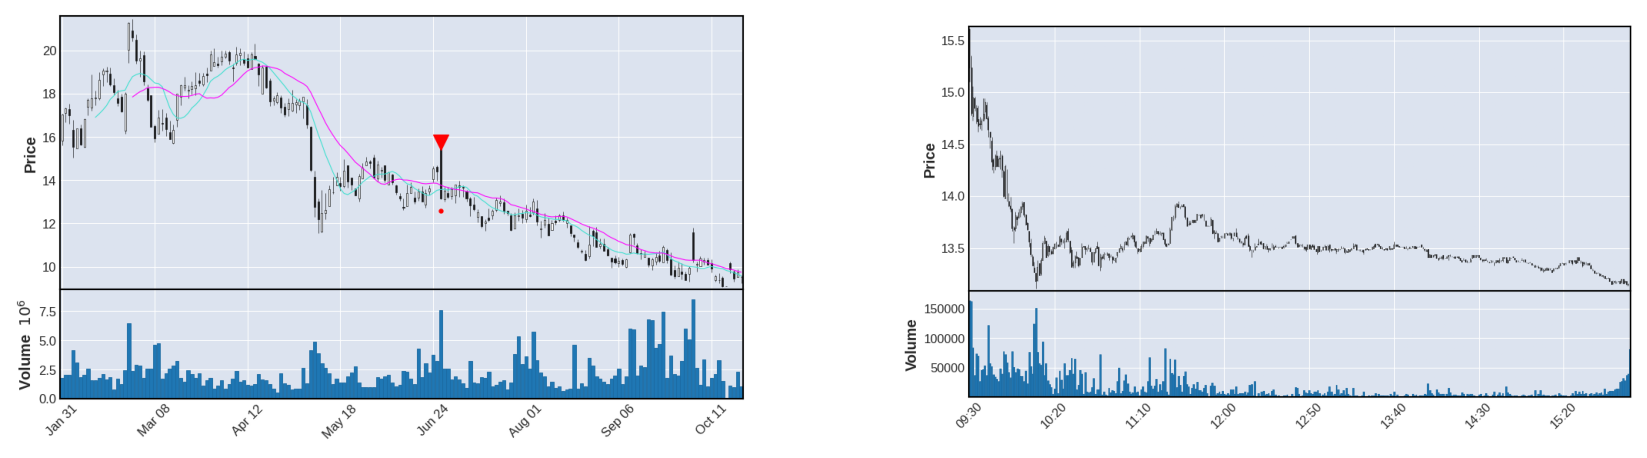

COOK (2022-06-27)
 open  high  low  close  volume
 5.21  5.45 4.54   4.56  895643


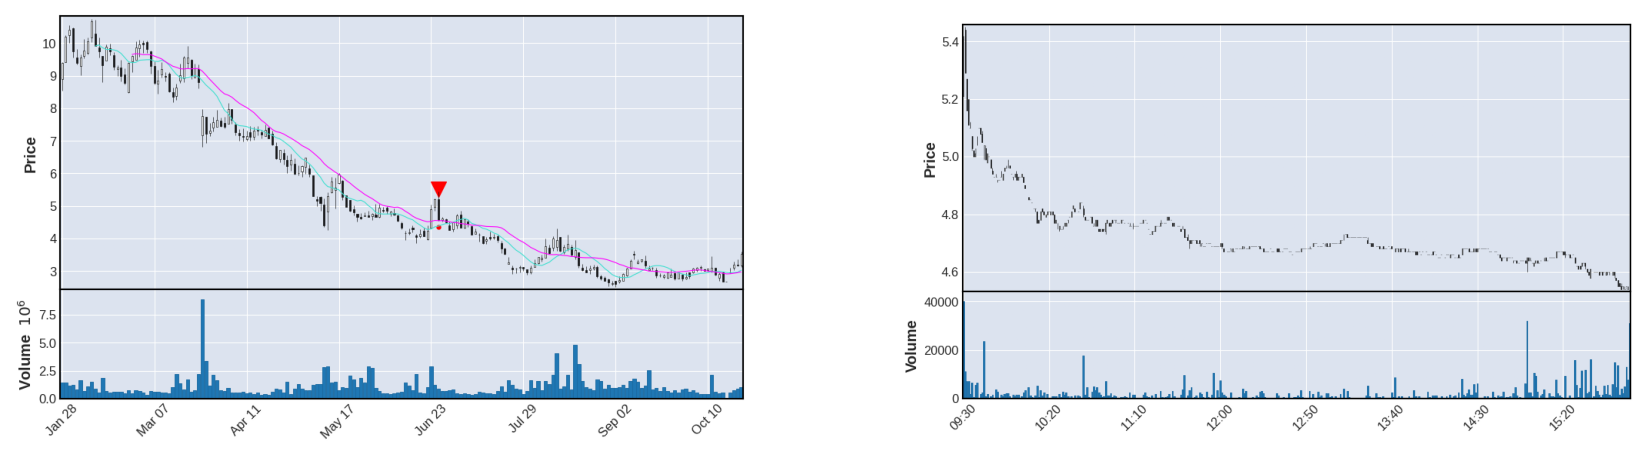

REAL (2022-06-27)
 open  high  low  close  volume
 3.71  3.75 3.22   3.31 4119083


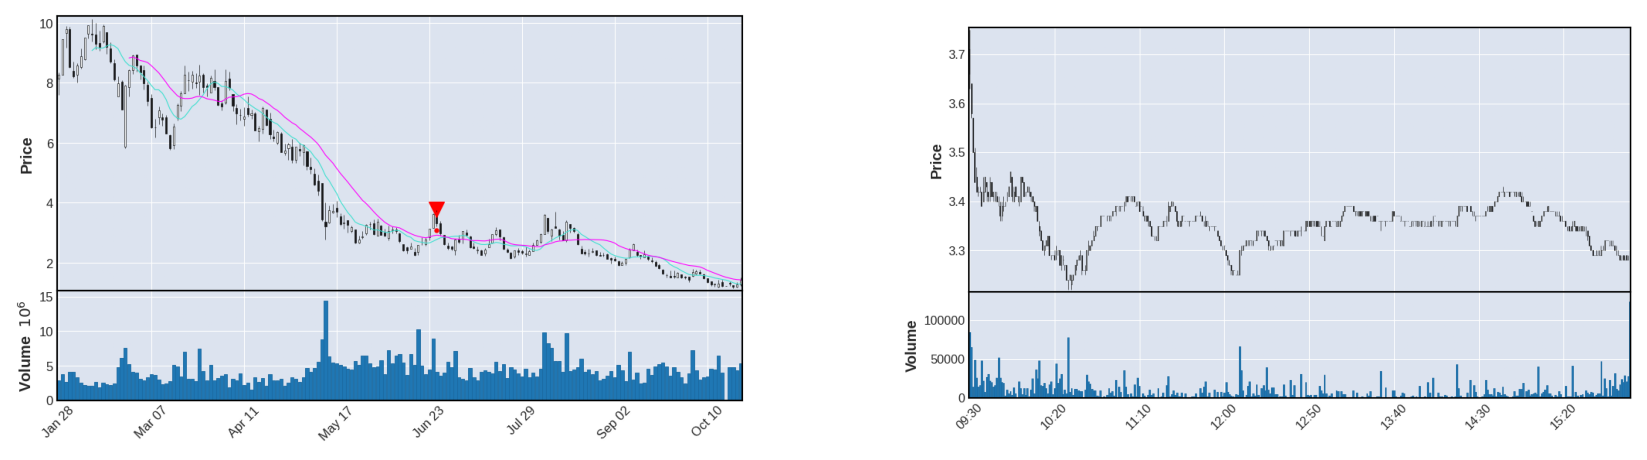

ENTA (2022-06-24)
 open  high  low  close  volume
46.38 46.57 43.0  45.01  345599


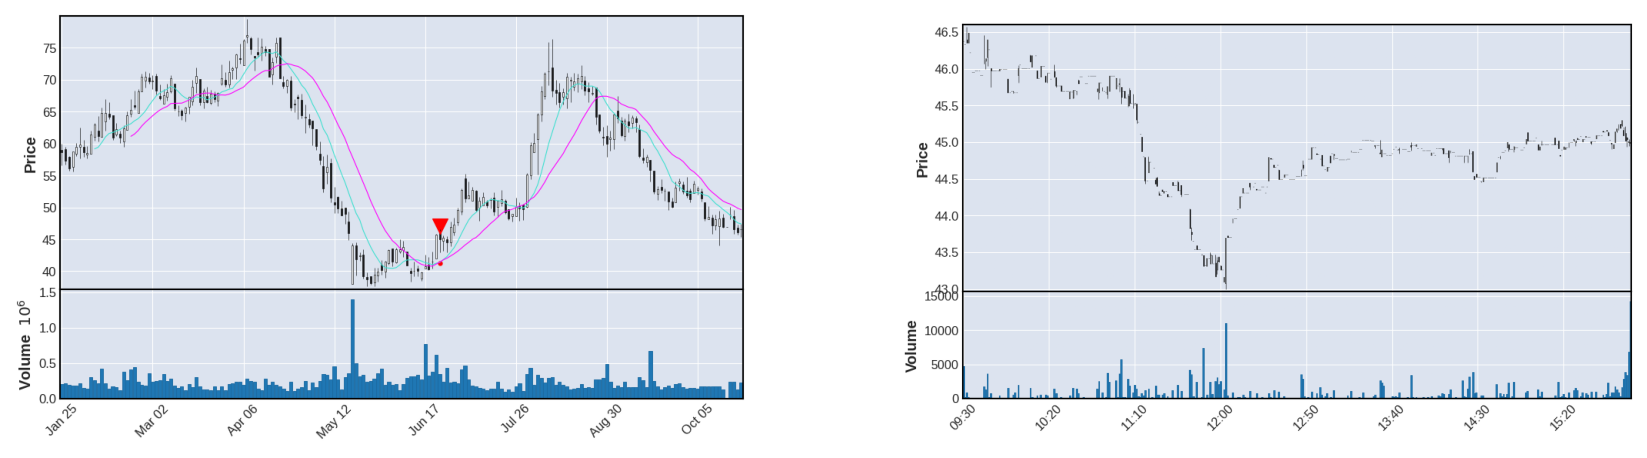

JZXN (2022-06-23)
 open  high  low  close  volume
 1.17  1.25 0.88   0.95 3711901


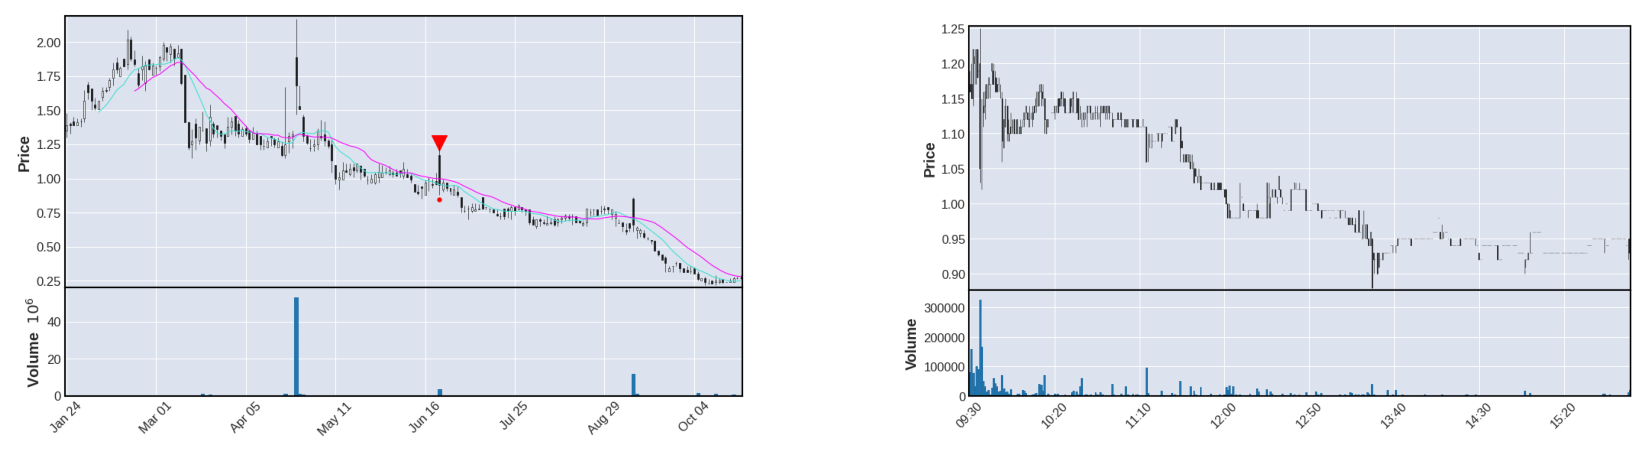

PRTY (2022-06-21)
 open  high  low  close  volume
 1.53  1.57 1.43   1.44 4125849


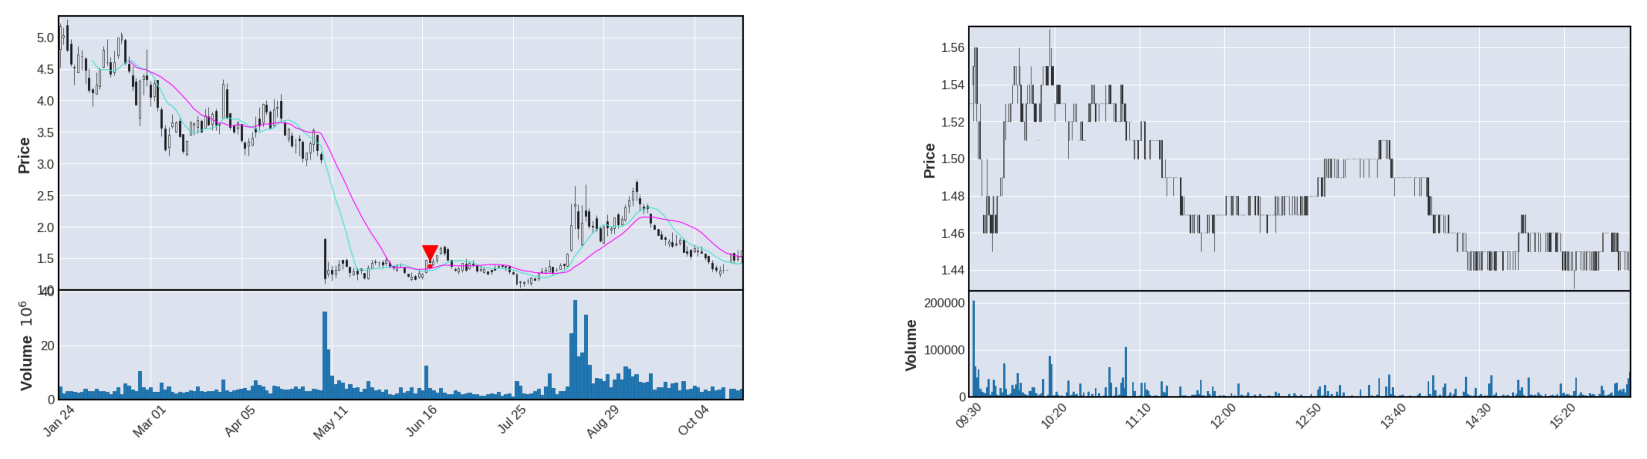

AKAN (2022-06-17)
 open  high  low  close  volume
 1.28  1.53 1.05   1.09 5177348


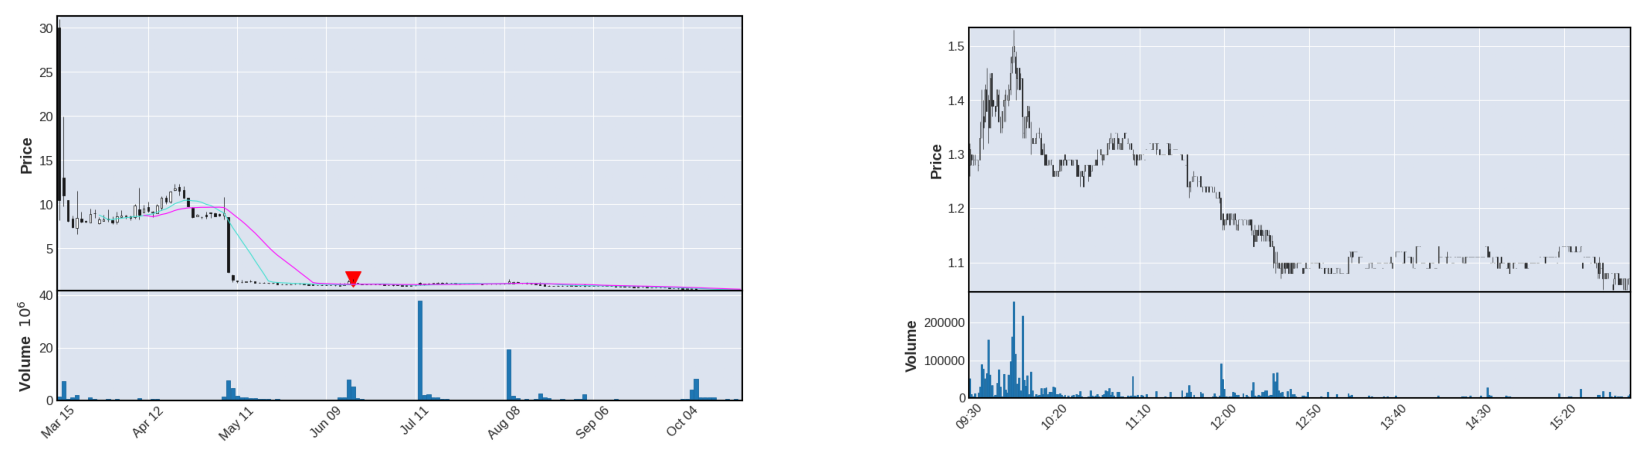

MCRB (2022-06-08)
 open  high  low  close  volume
 4.15  4.29 3.85   3.86 1884264


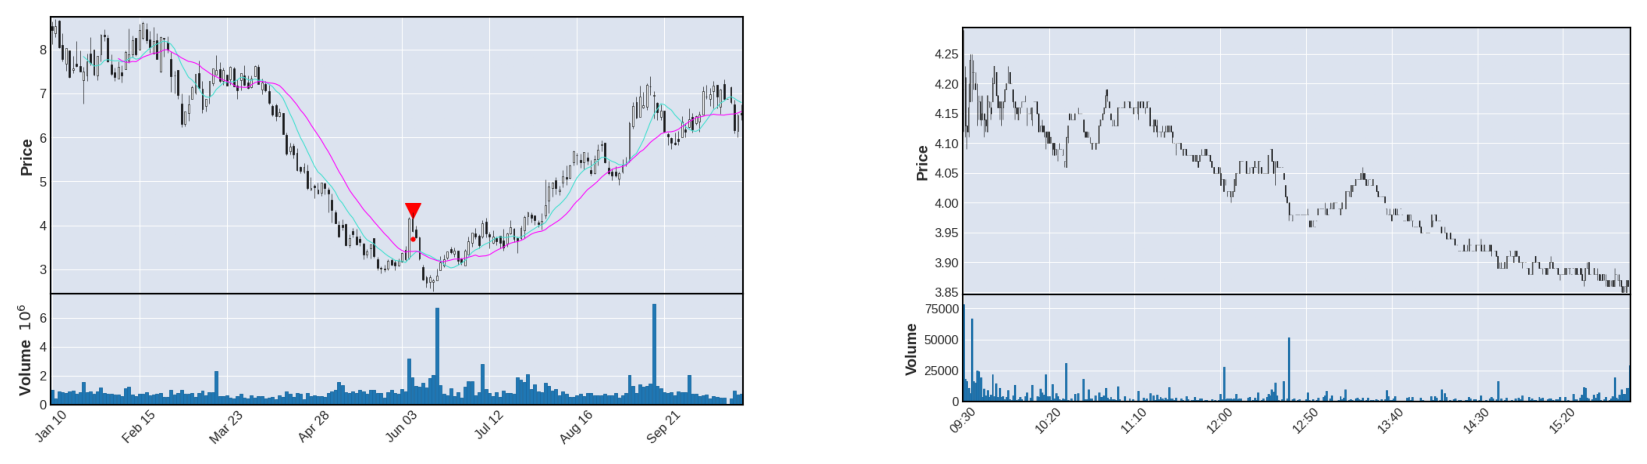

LEA (2022-05-20)
  open   high    low  close  volume
138.79 139.77 128.52 132.76  539067


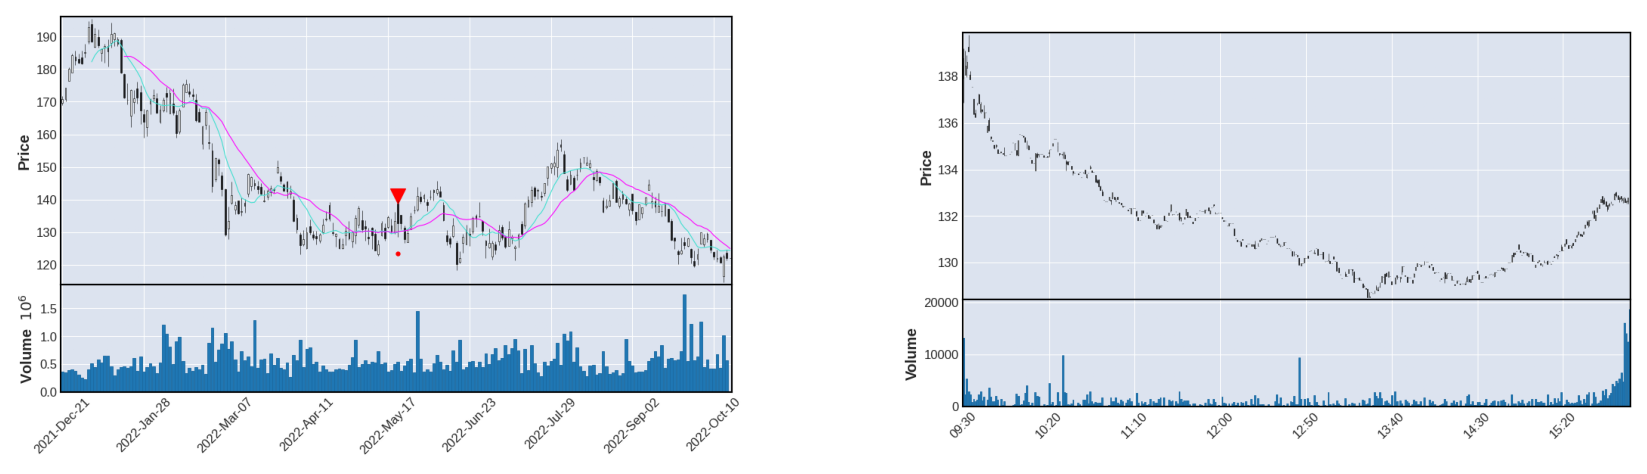

SEMR (2022-05-20)
 open  high  low  close  volume
10.56 11.15 9.64   9.96  386584


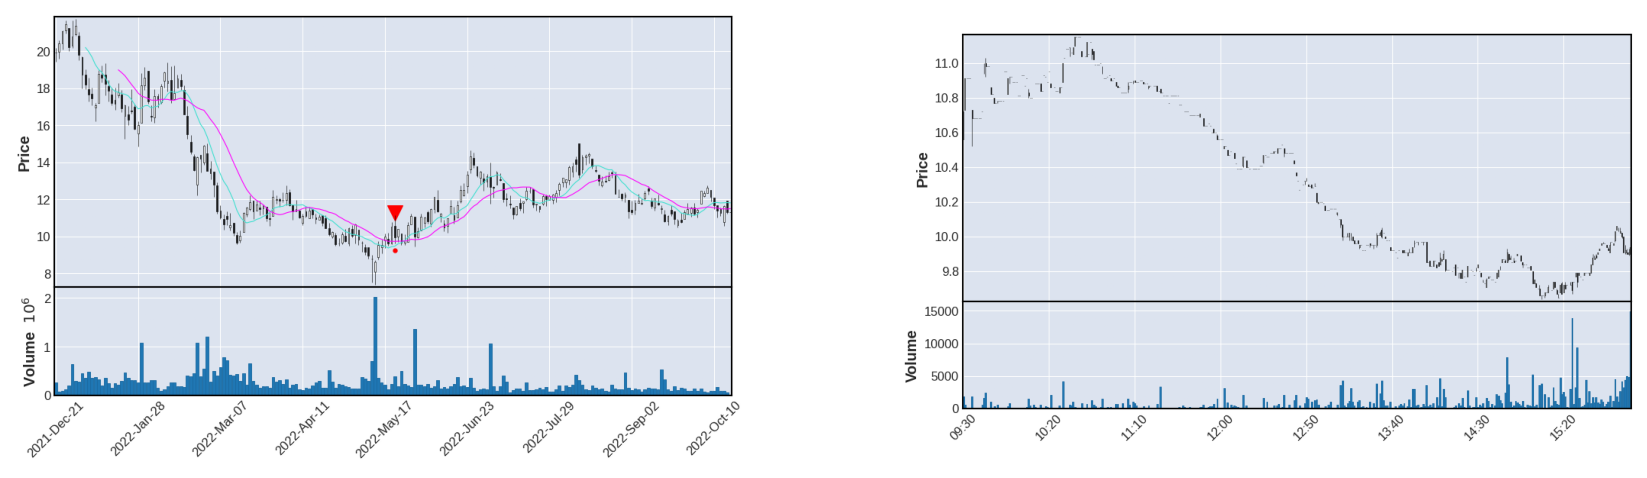

HOLI (2022-05-17)
 open  high   low  close  volume
15.21 16.52 14.98  15.09  377610


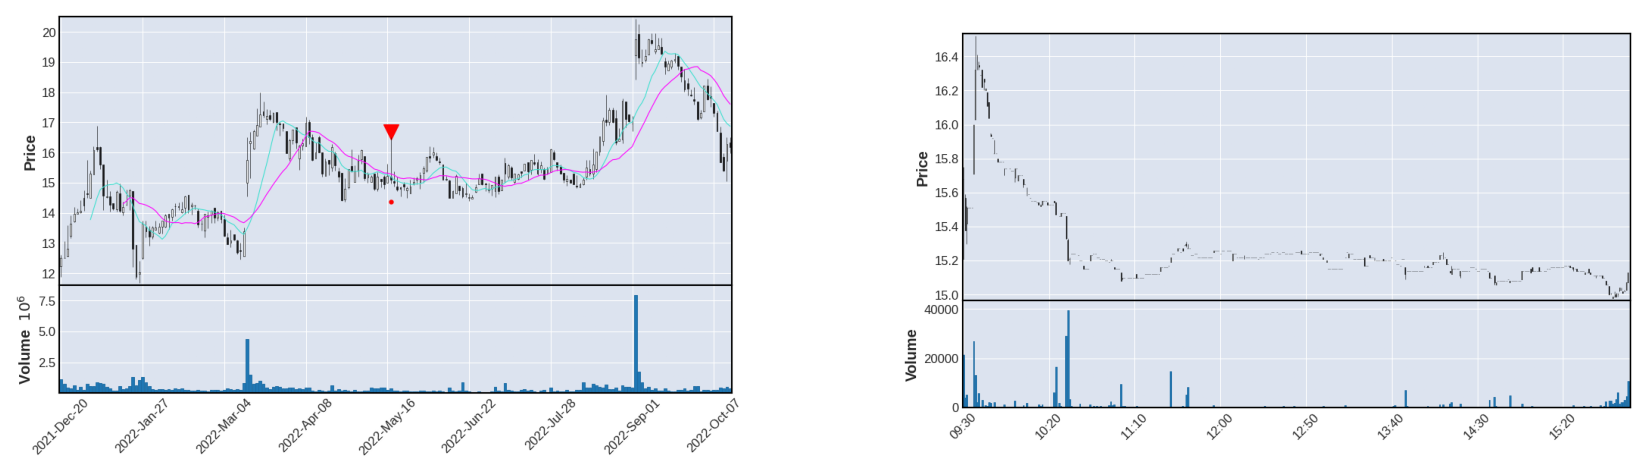

EVAX (2022-05-10)
 open  high  low  close   volume
 3.18  3.22  1.9   2.25 21645431


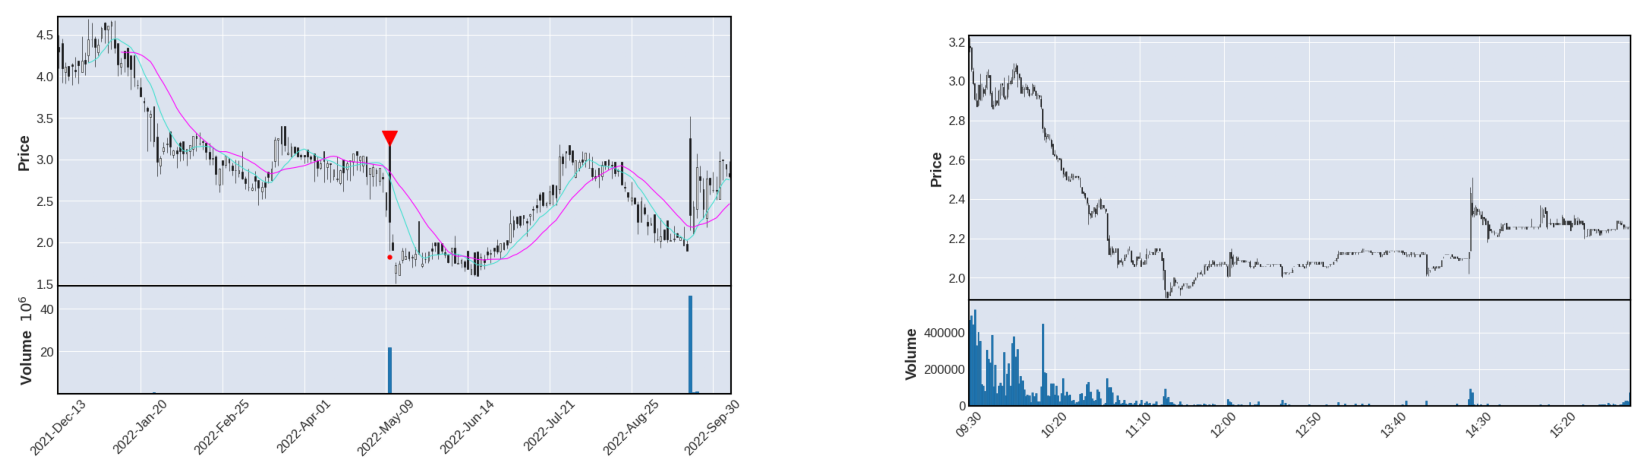

SMFL (2022-05-10)
 open  high  low  close   volume
 0.99  1.36 0.82   0.88 15426732


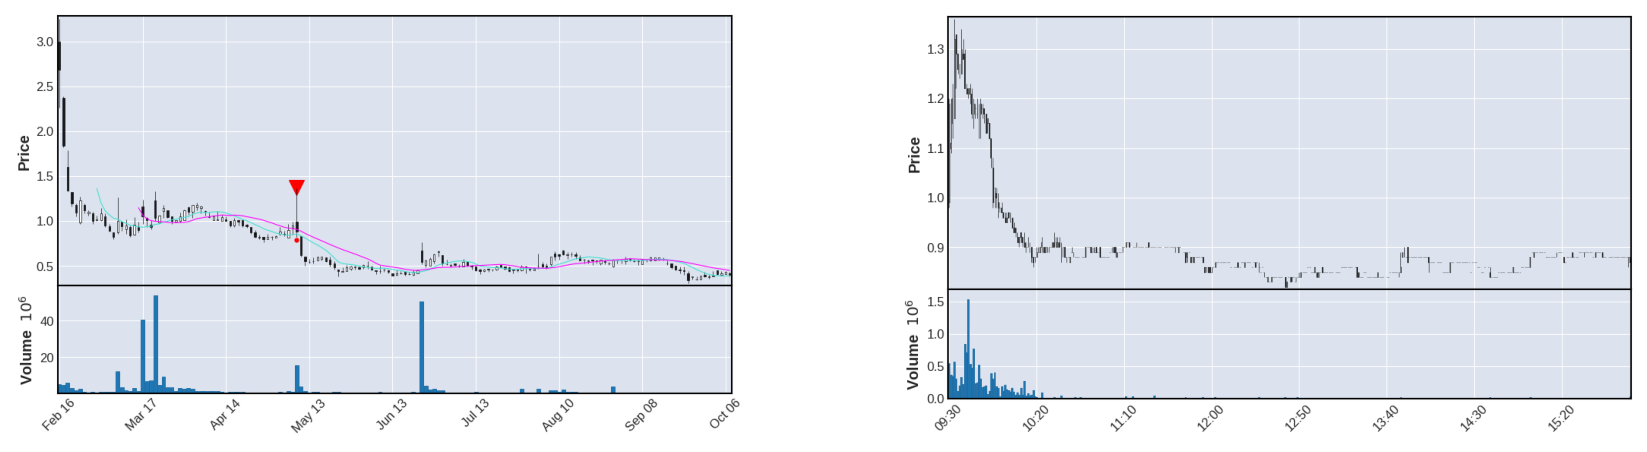

TPIC (2022-05-06)
 open  high   low  close  volume
13.82 14.86 11.94  12.26 1914007


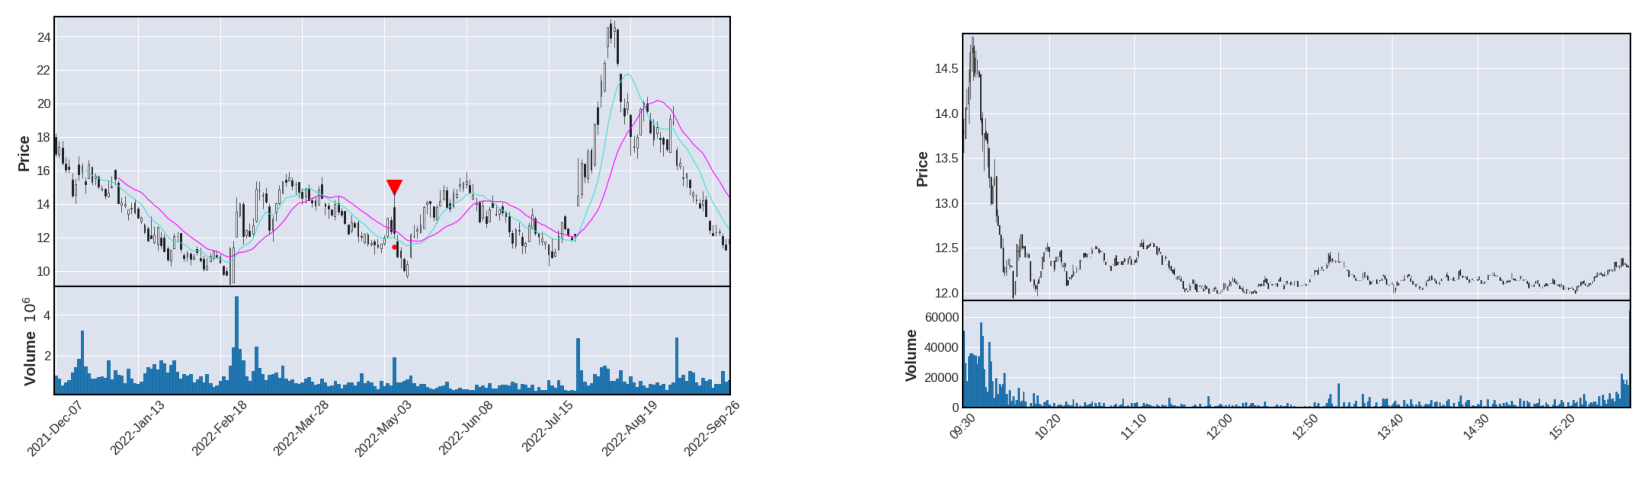

AUST (2022-05-04)
 open  high  low  close  volume
  6.5  29.0 4.15   4.37 8084214


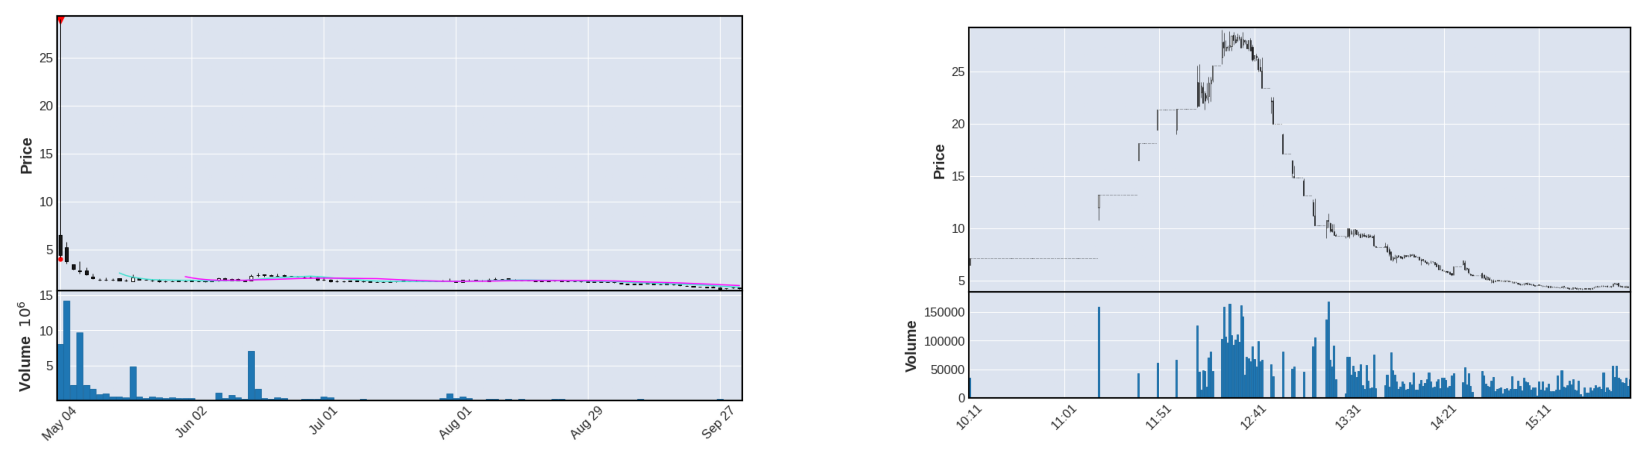

BASE (2022-04-29)
 open  high   low  close  volume
17.38 18.83 16.84   17.0  218698


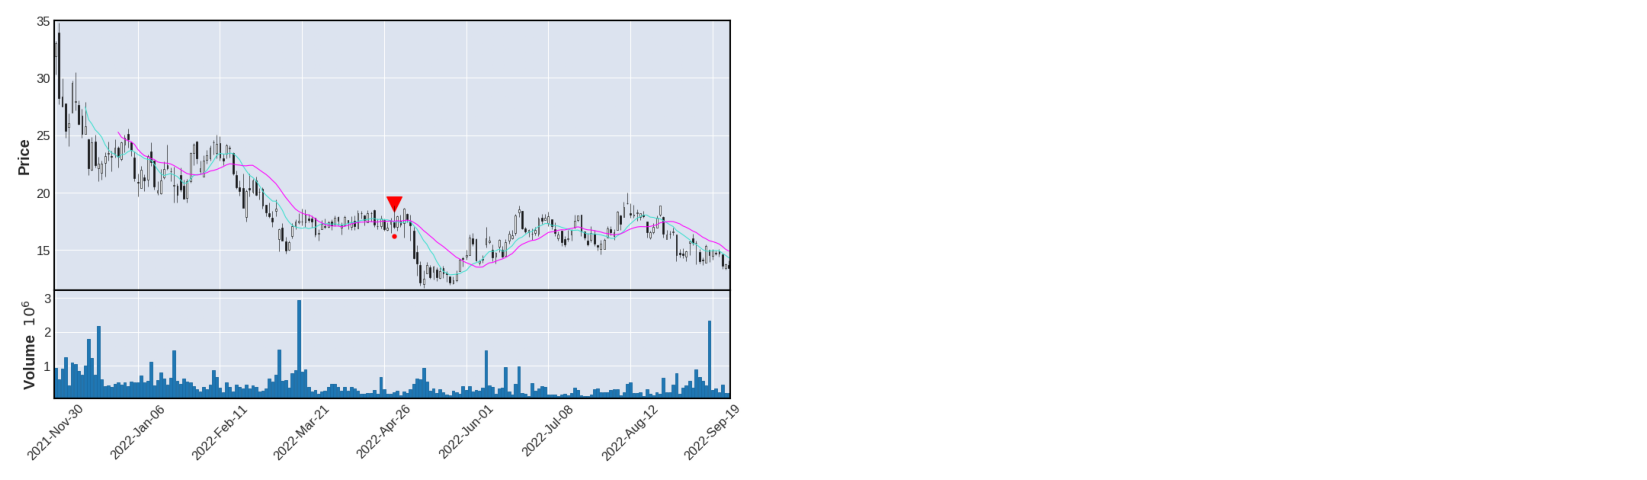

FBHS (2022-04-29)
 open  high   low  close  volume
75.62 78.91 71.04  71.25 4023502


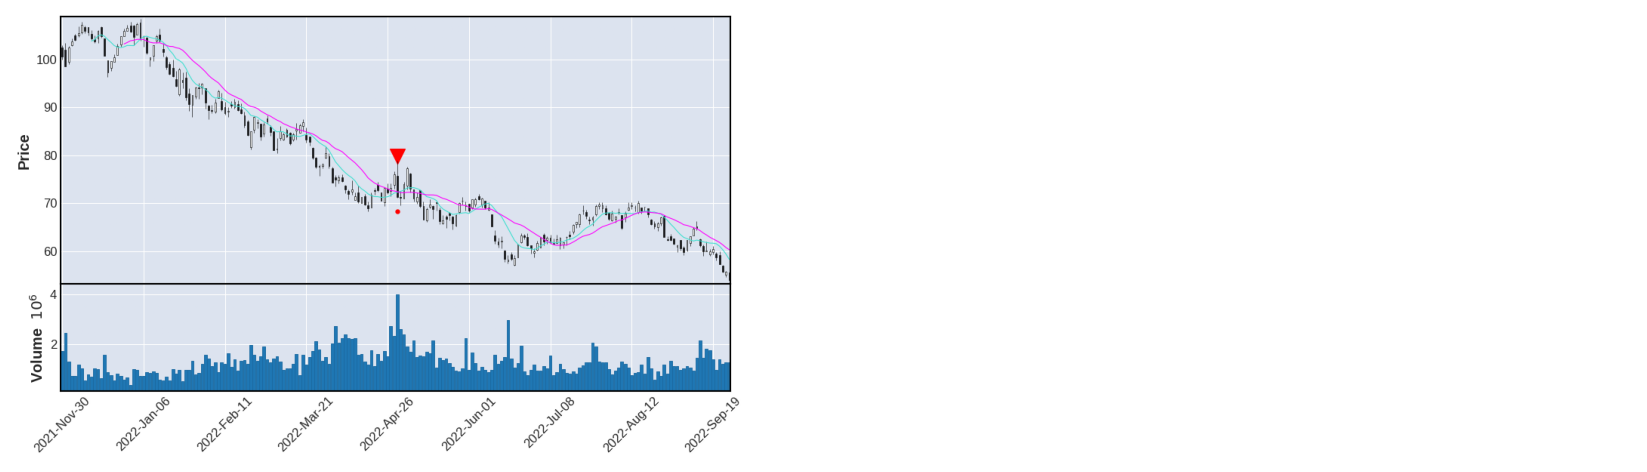

DRV (2022-04-28)
 open  high   low  close  volume
 34.7 35.68 32.88  33.03  153904


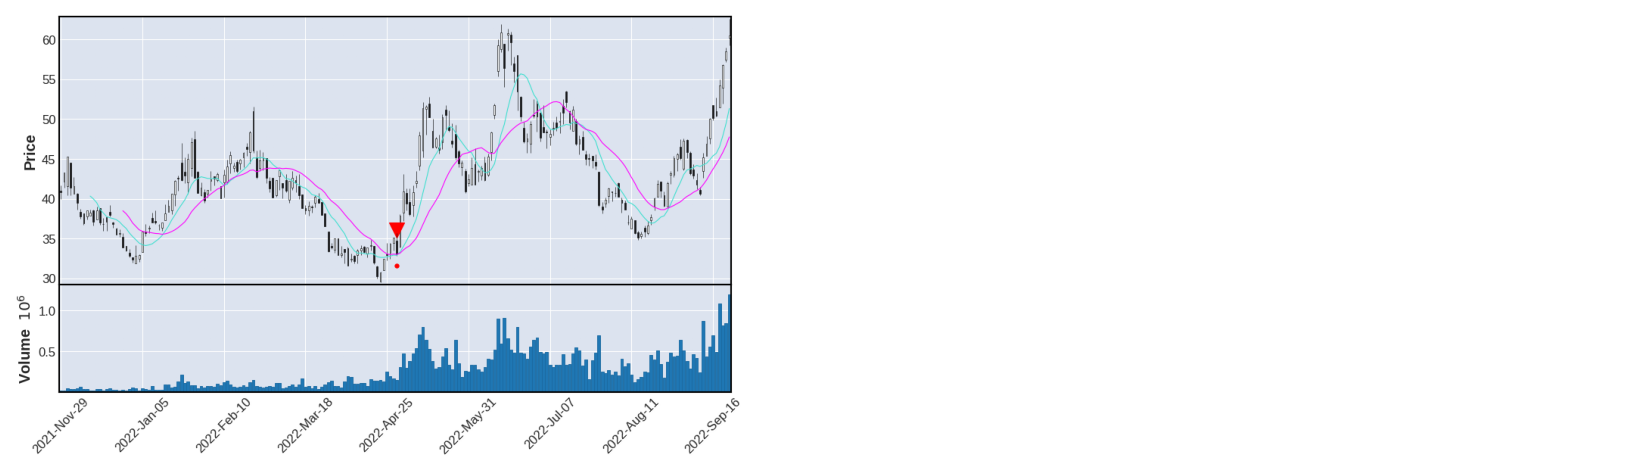

DSEY (2022-04-21)
 open  high  low  close  volume
 8.25  8.46 7.79   7.86  583287


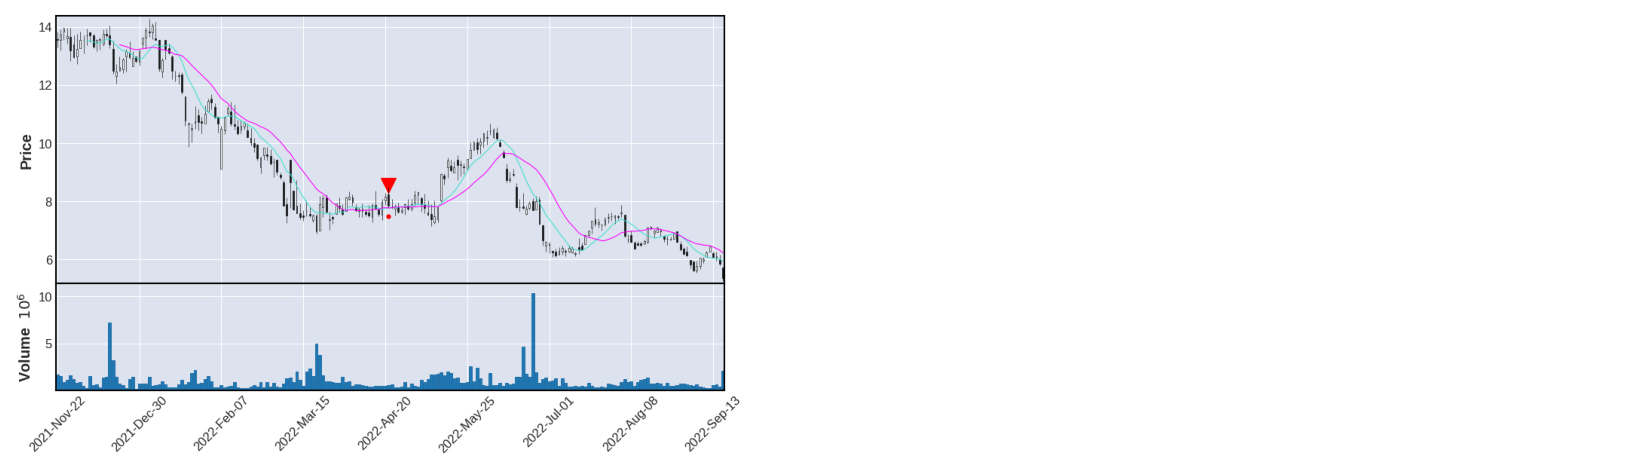

BYND (2022-03-23)
 open  high   low  close  volume
 51.2 53.47 49.93   50.1 3074237


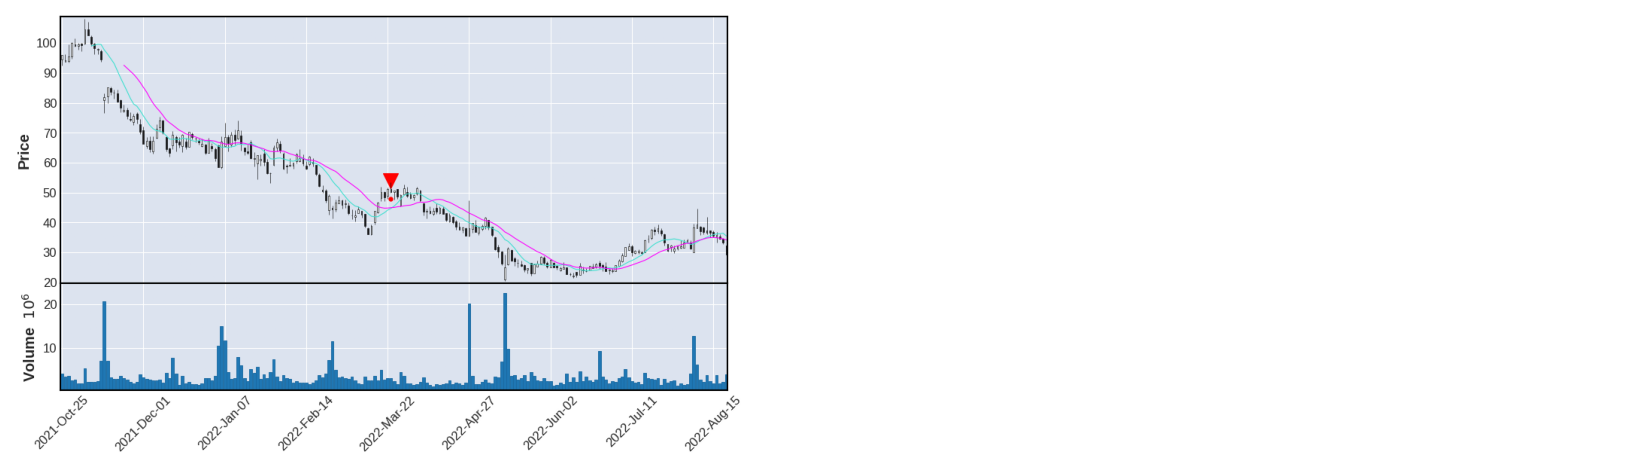

CGC (2022-03-23)
 open  high  low  close  volume
 7.37  7.74 7.06   7.09 6677641


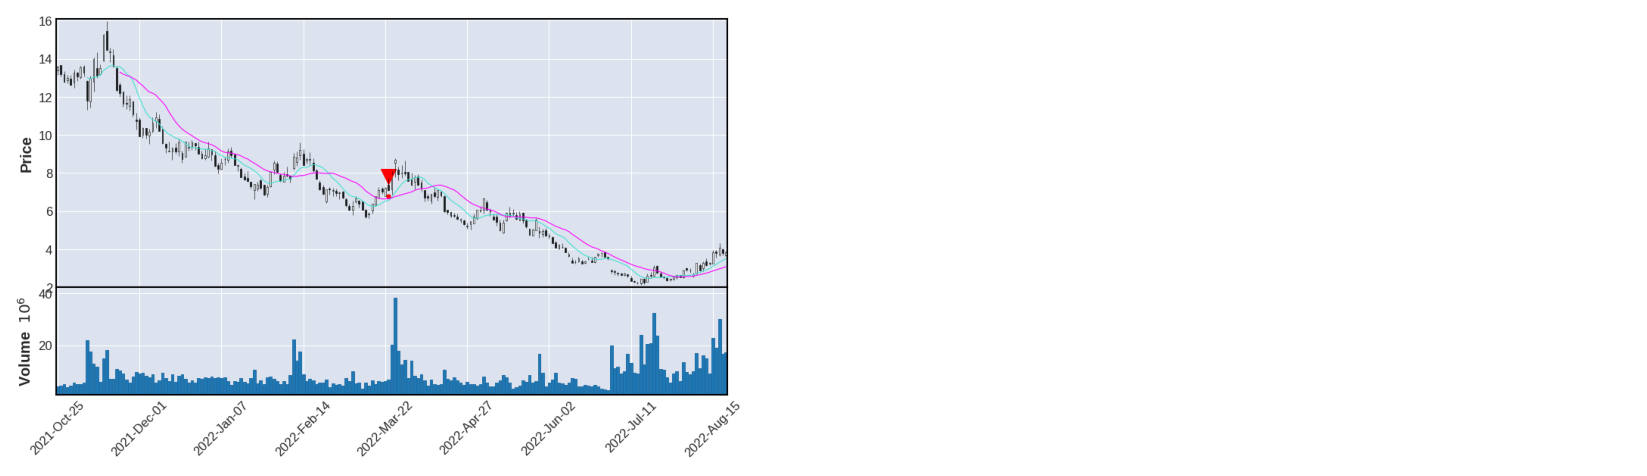

BFRI (2022-03-18)
 open  high  low  close  volume
  3.2  3.49 2.95   2.95 1413431


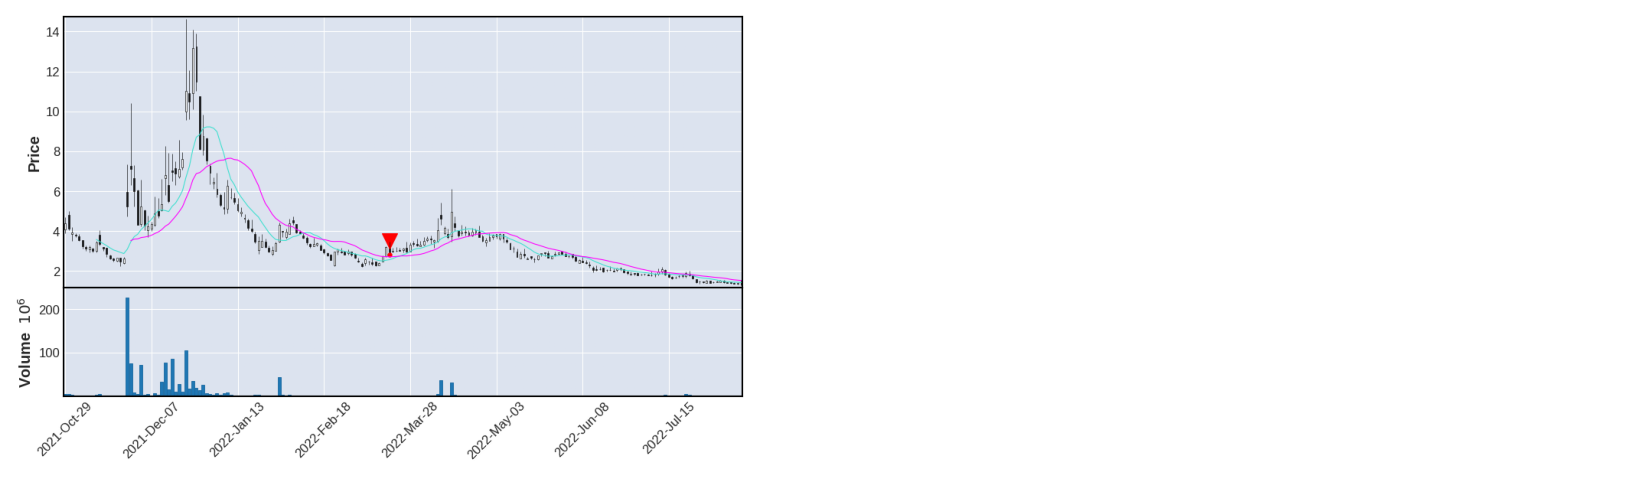

STRN (2022-03-18)
 open  high  low  close  volume
 1.79  2.02 1.71   1.71 1544613


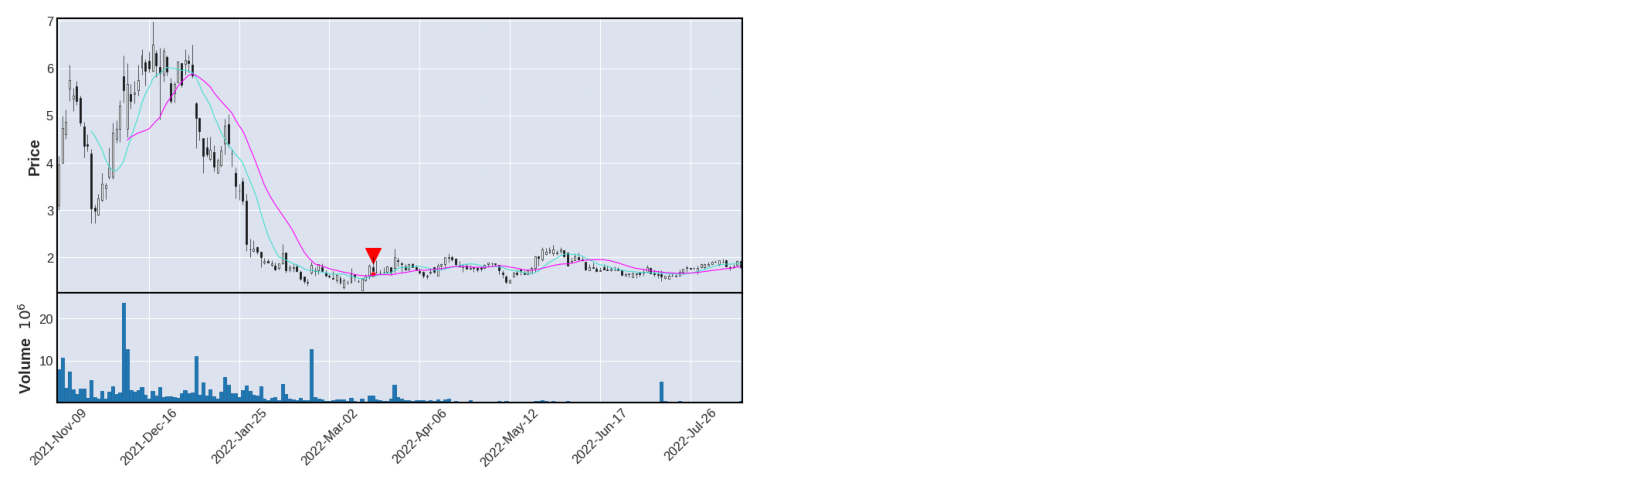

ACN (2022-03-17)
 open   high    low  close  volume
338.9 344.46 318.33  319.5 4661577


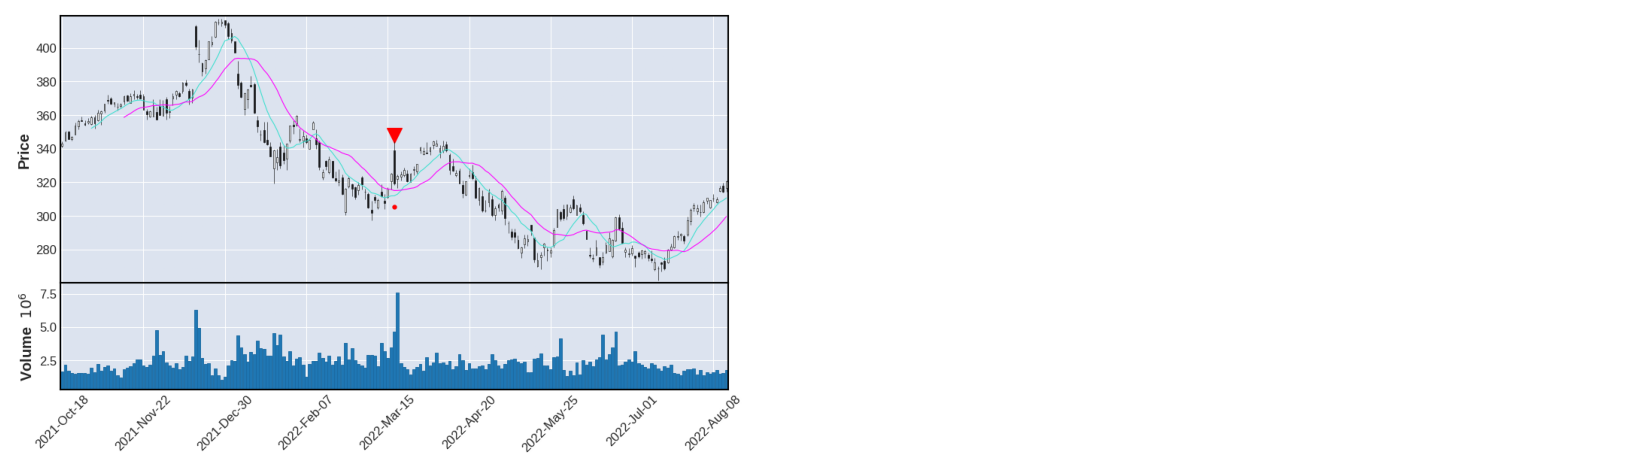

FEAM (2022-03-16)
 open  high   low  close  volume
 49.5  49.5 27.64  28.97    6090


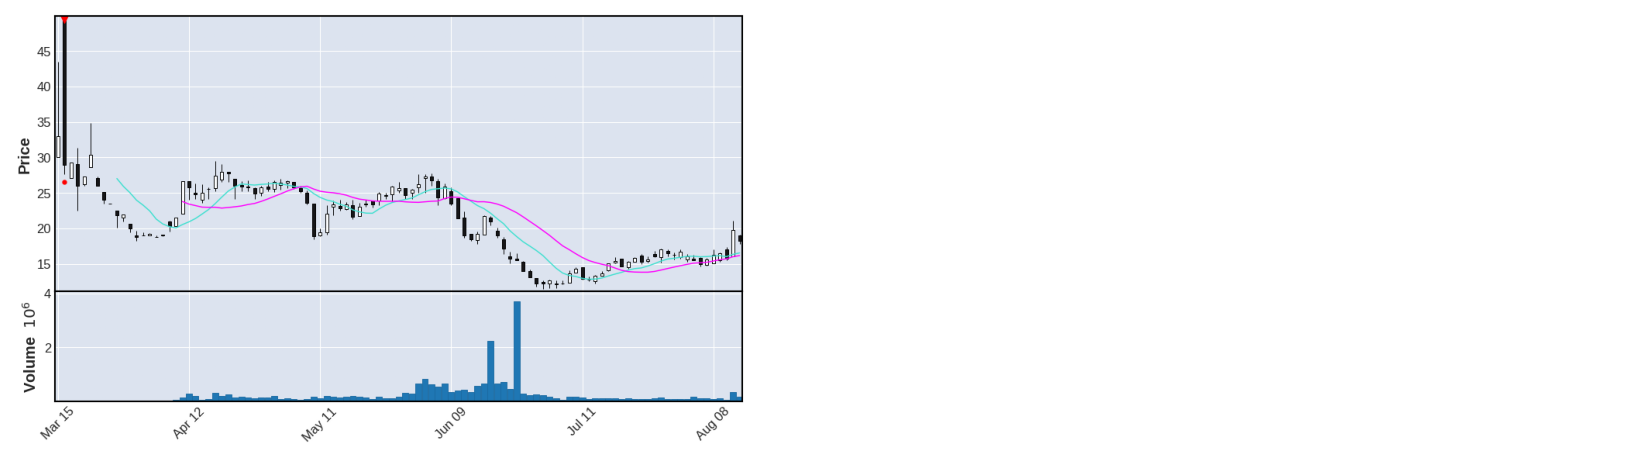

LOCO (2022-03-11)
 open  high   low  close  volume
 13.7 13.97 11.35  11.41  787972


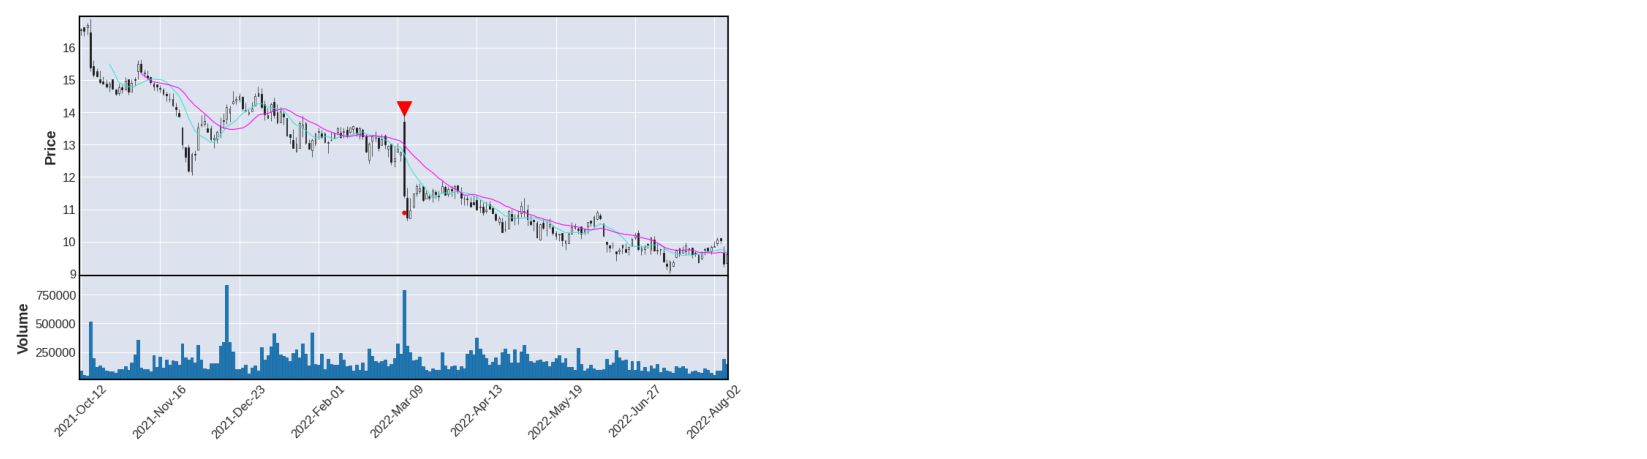

NKTX (2022-03-11)
 open  high  low  close  volume
10.65 10.87 9.91   9.96  211141


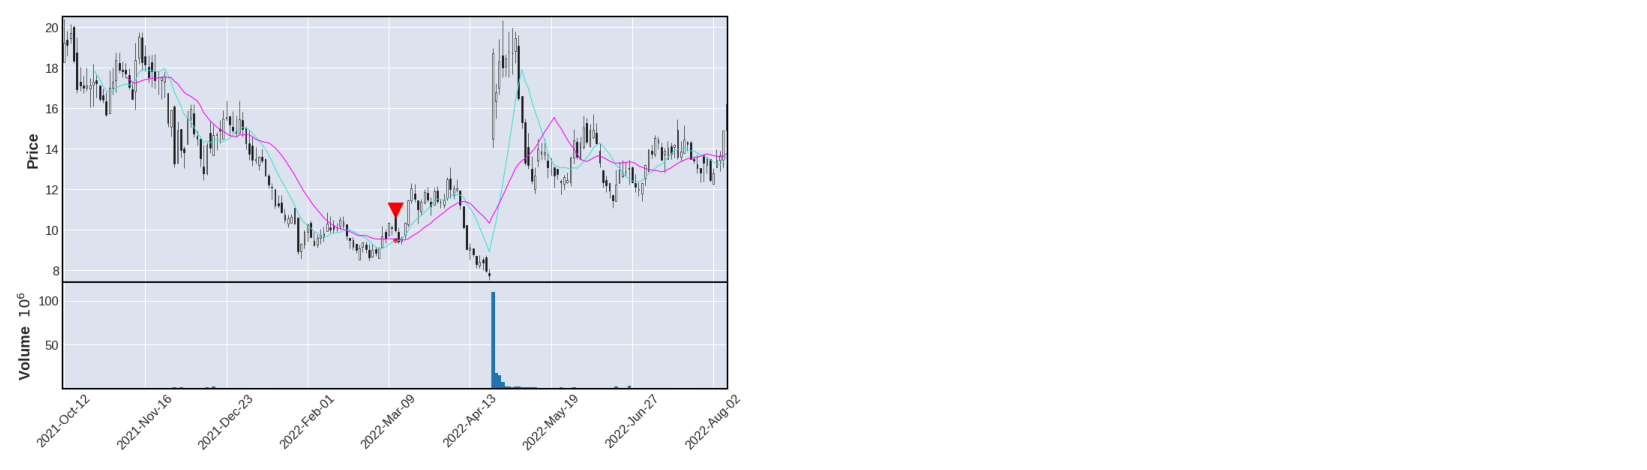

DDD (2022-03-01)
 open  high   low  close  volume
20.48 20.51 17.14  17.26 9211614


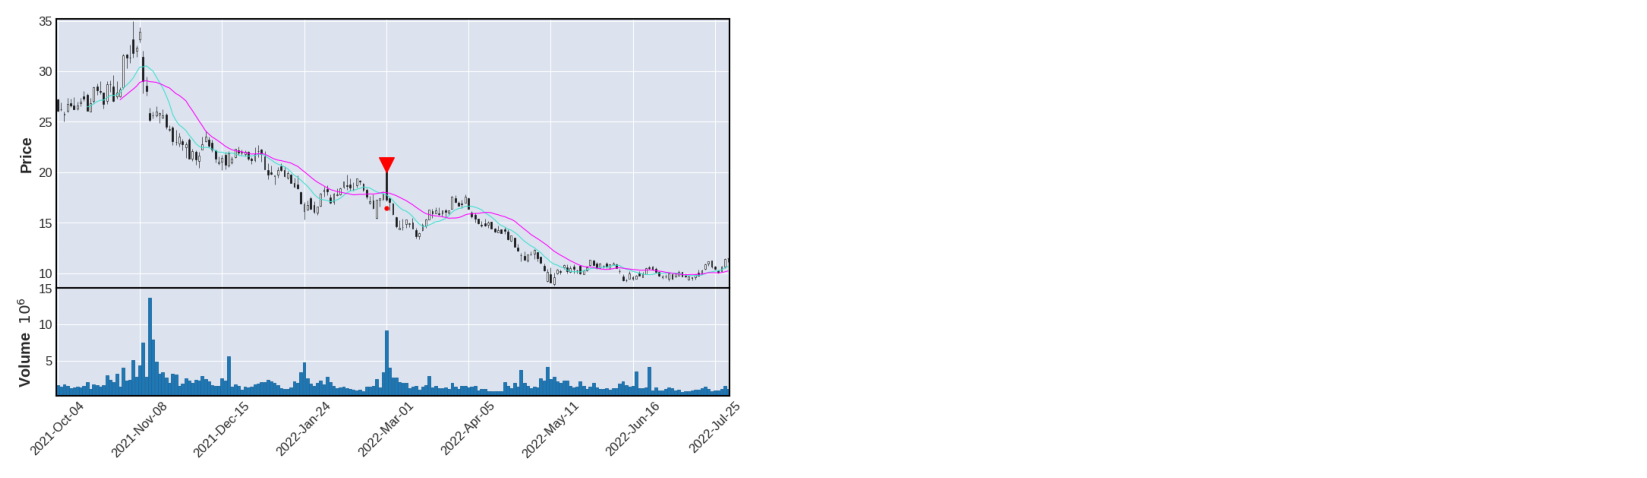

QTRX (2022-03-01)
 open  high   low  close  volume
33.82 35.98 31.02   31.6  841797


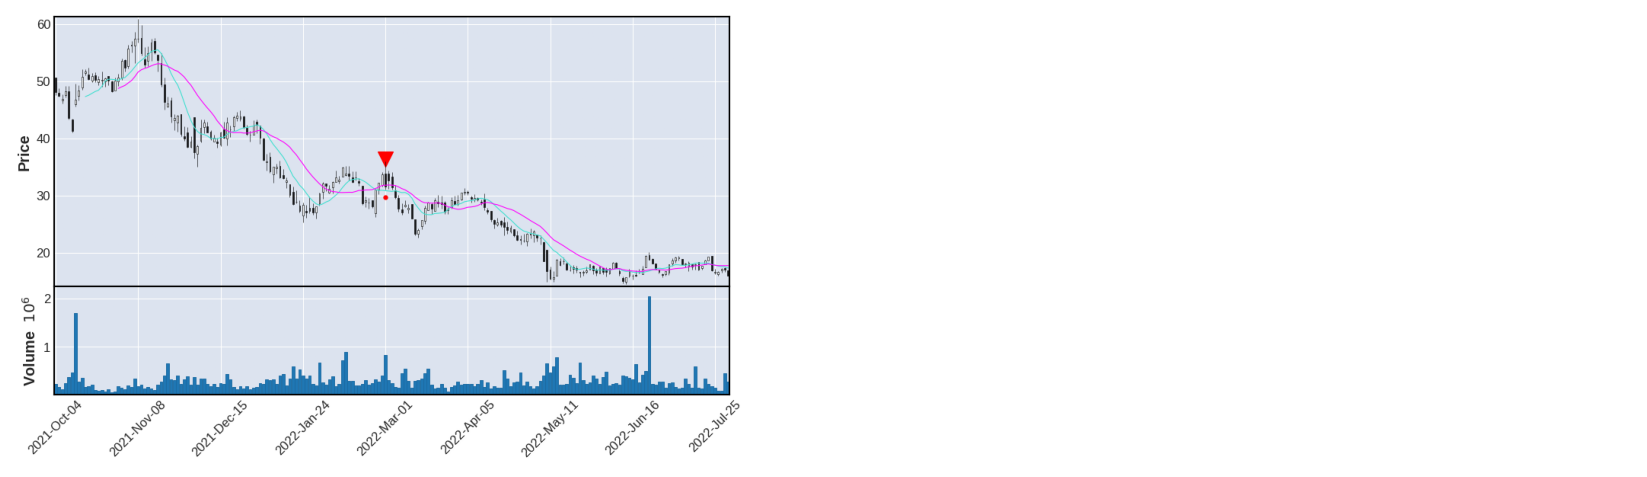

BHIL (2022-02-28)
 open  high  low  close  volume
 3.35  3.51 3.21   3.23  319372


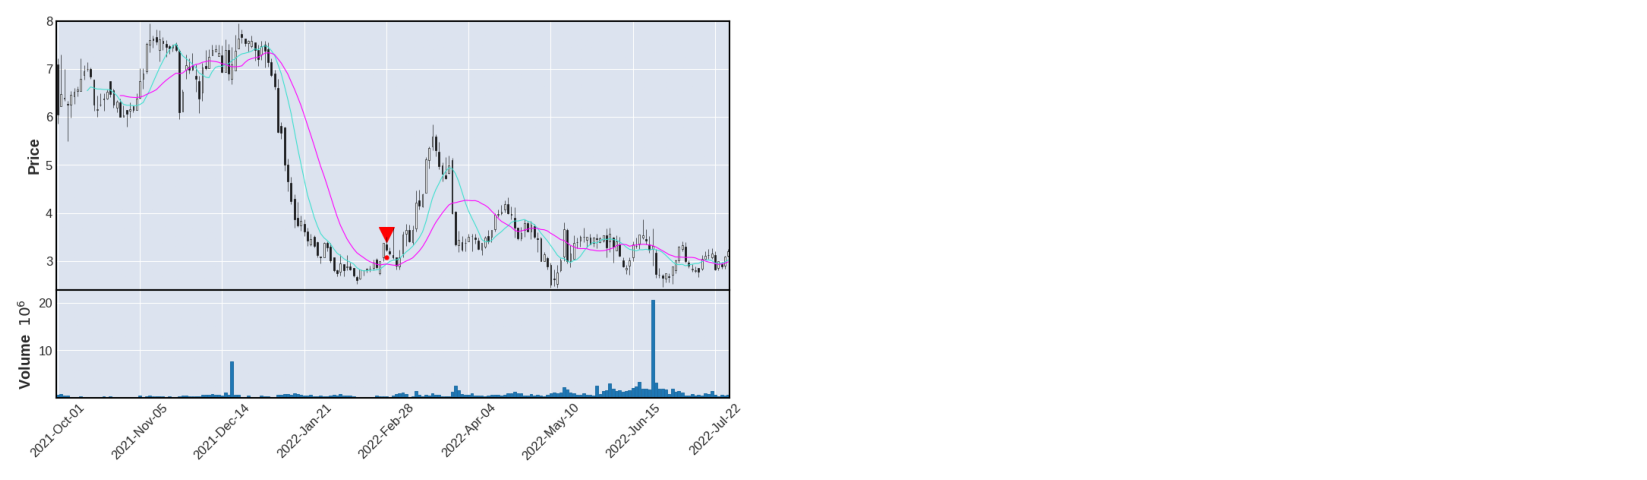

HSKA (2022-02-28)
 open   high    low  close  volume
152.0 153.77 141.35  142.0  156200


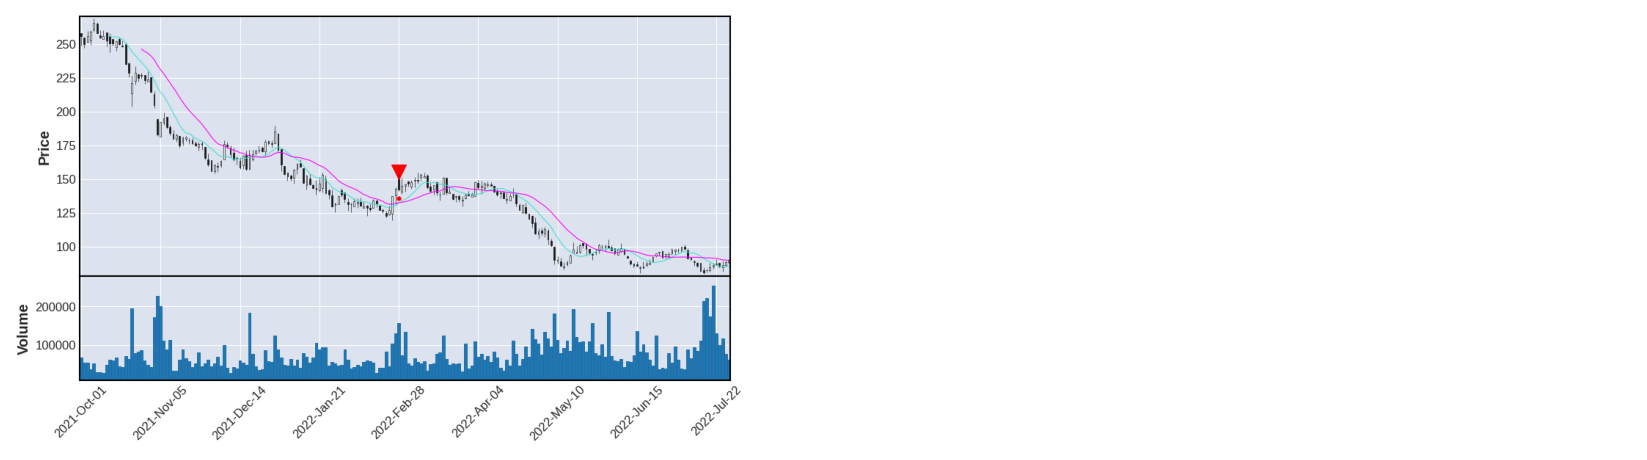

STKL (2022-02-28)
 open  high  low  close  volume
  5.4  5.54 5.21   5.33  947287


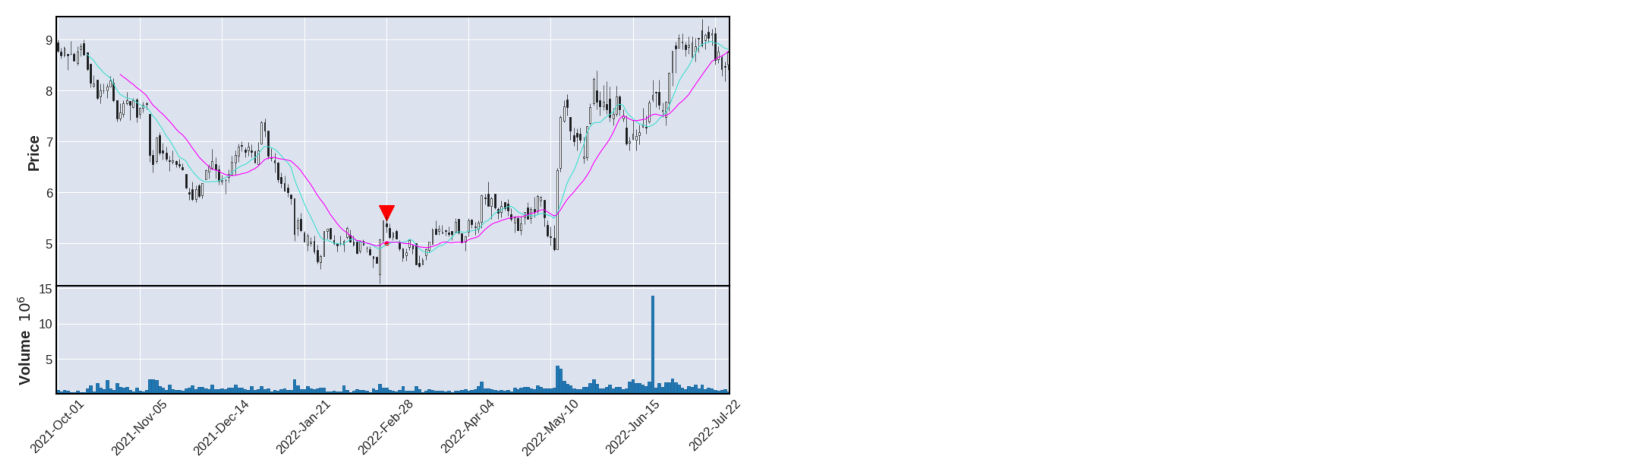

AN (2022-02-17)
  open  high    low  close  volume
112.09 114.5 105.22 106.93 1722204


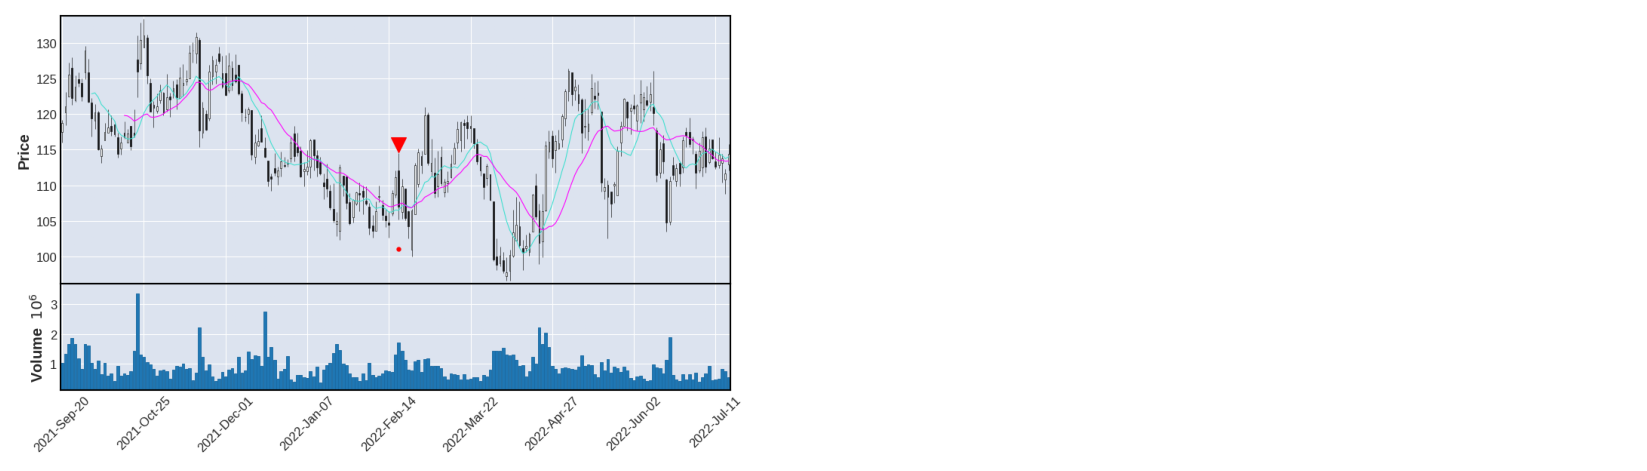

MD (2022-02-17)
 open  high   low  close  volume
26.12 27.11 23.69  24.18  538746


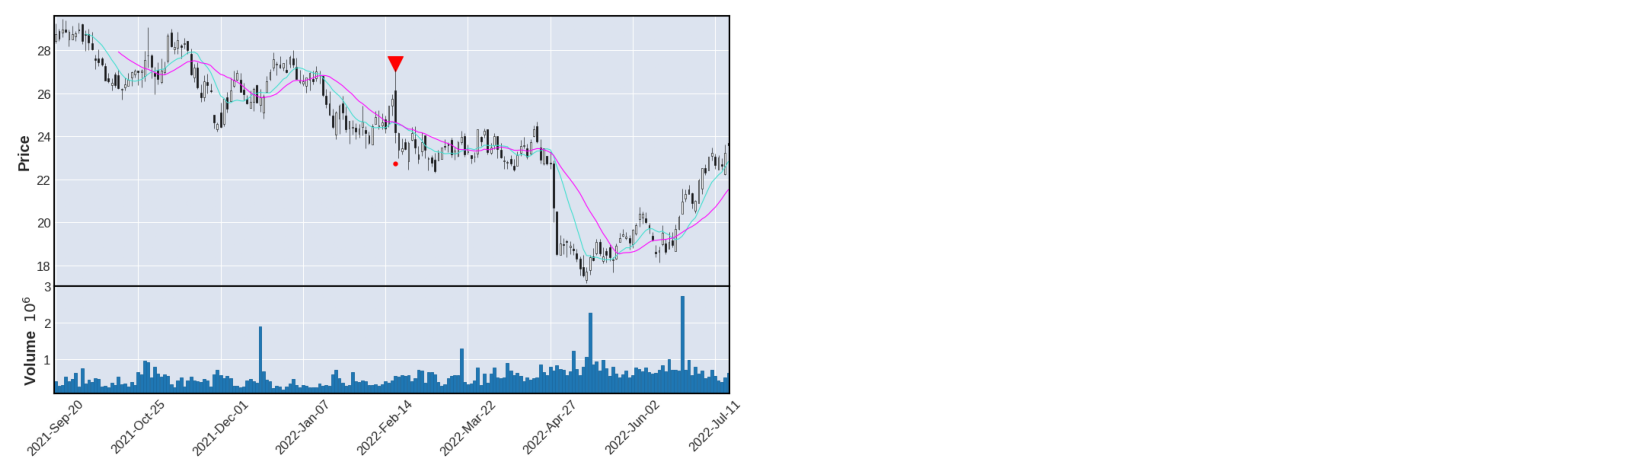

VAXX (2022-01-13)
 open  high  low  close  volume
 7.39  7.79 6.79   6.86  470191


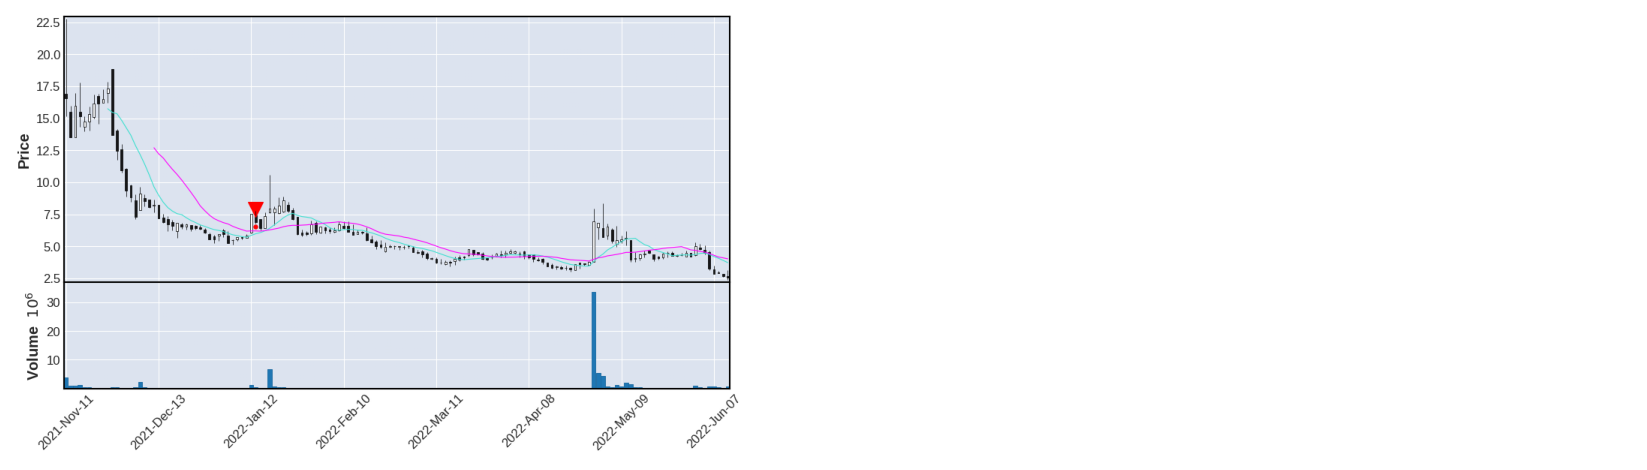

SSG (2022-01-10)
 open  high   low  close  volume
20.55  21.2 19.64  19.71   60568


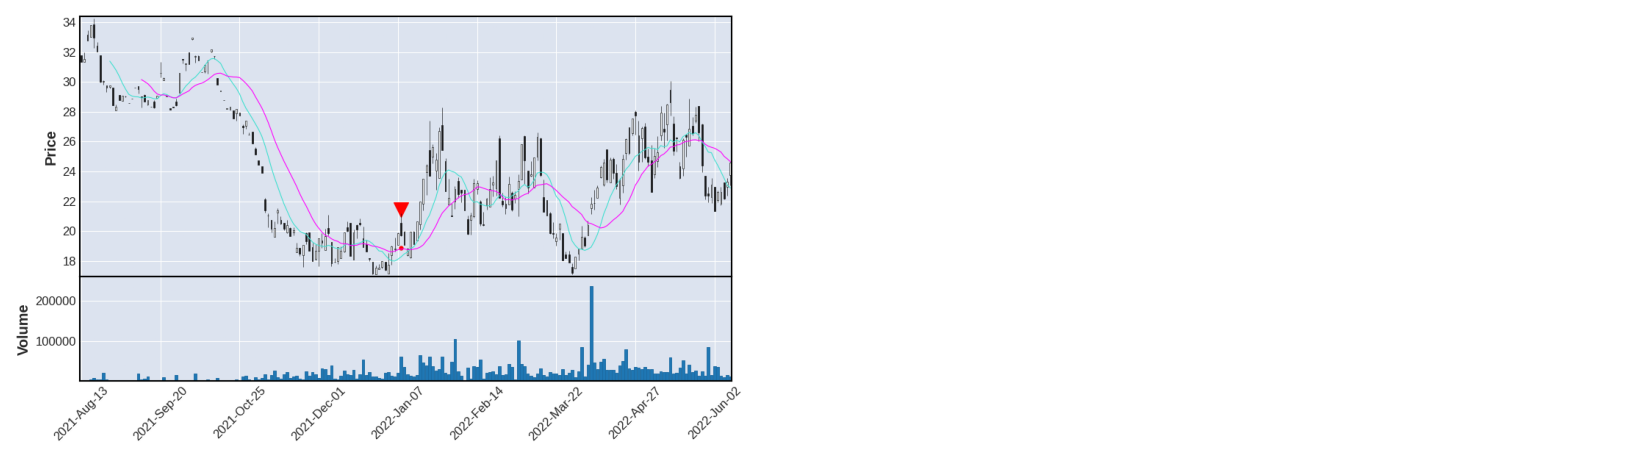

DSEY (2022-01-05)
 open  high   low  close  volume
13.84 14.28 13.66  13.81 1453439


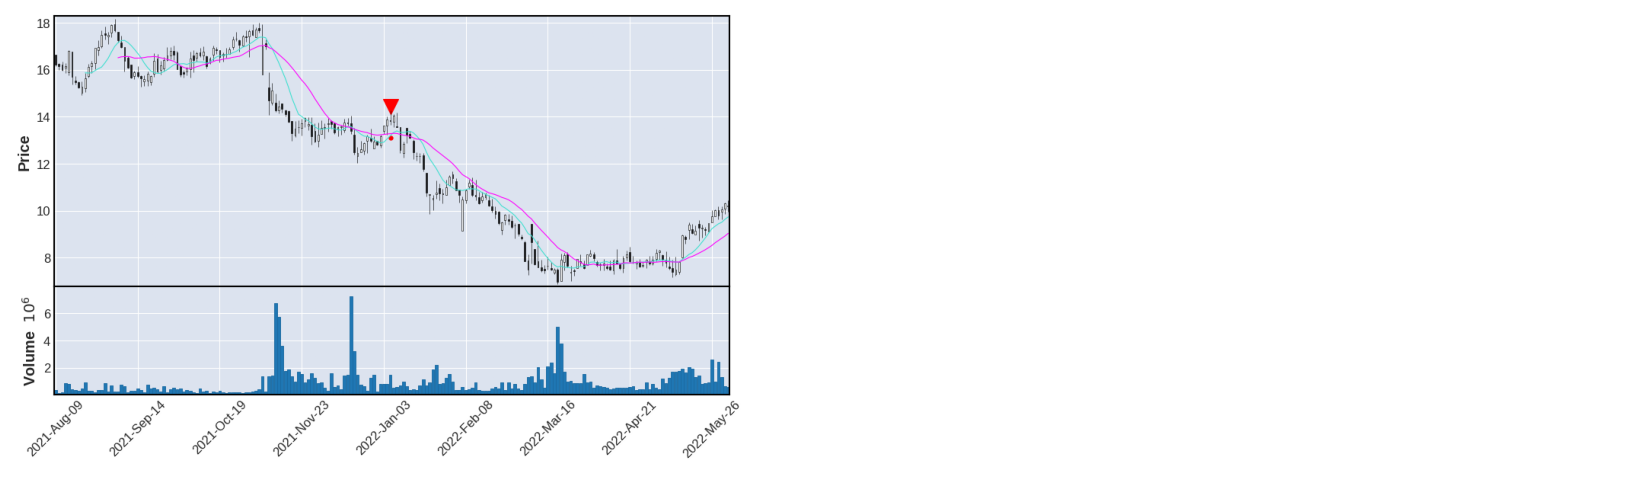

NKLA (2021-12-27)
 open  high   low  close   volume
11.89 12.14 10.64  10.78 37303881


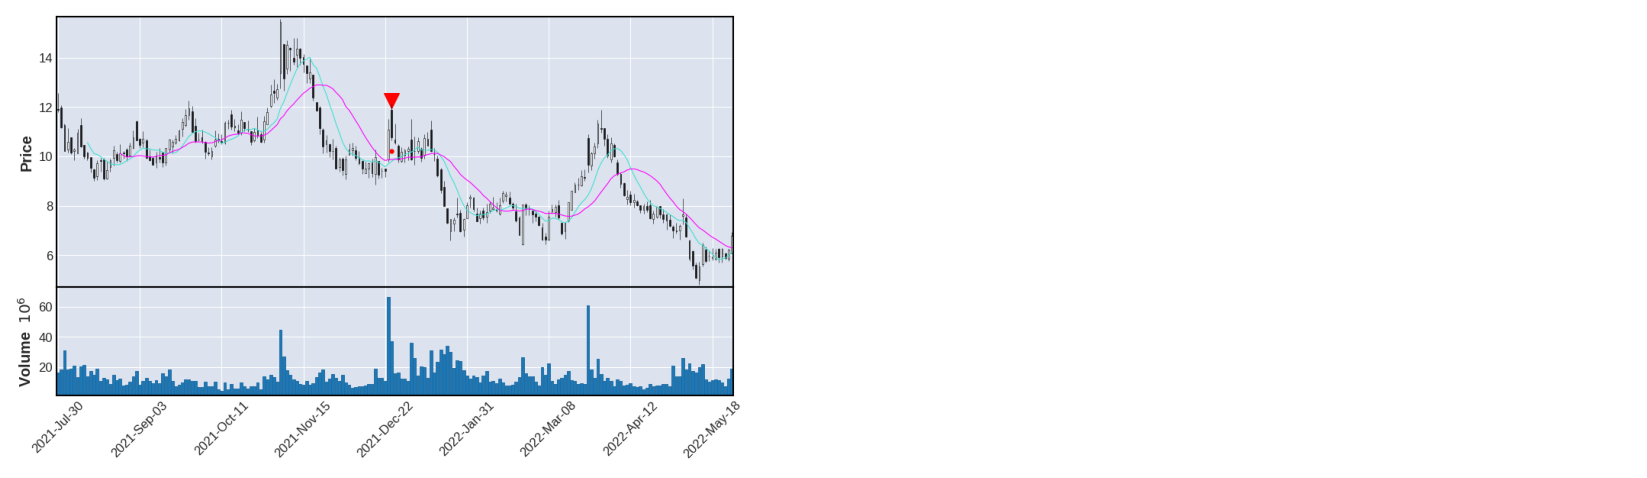

In [109]:
direction = Direction.SHORT

for index, row in df.iterrows():
    
    ######################################################
    # fetch daily
    ######################################################
    start = (row['patternTime'] + pd.DateOffset(days=-150)).strftime('%Y-%m-%d')
    end = (row['patternTime'] + pd.DateOffset(days=150)).strftime('%Y-%m-%d')

    url = baseurl + '/chart/' + row['symbol'] + '/d?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)
    chartResponse = requests.get(url)
    chartDf = None
    try:
      chartDf = pd.DataFrame(chartResponse.json()['payload'])
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      break
    
    chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
    chartDf = chartDf.set_index('tickTime')
    chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)

    entry = row['patternTime'].strftime('%Y-%m-%d')

    entryPoint1 = None
    entryPoint2 = None
    entryColor = None
    entryMarker = None
    if (direction == Direction.LONG):
      entryPoint1 = np.where(chartDf.index==entry, 1, np.nan) * 0.96 * chartDf['low']
      entryPoint2 = np.where(chartDf.index==entry, 1, np.nan) * 1.01 * chartDf['high']
      entryColor = 'green'
      entryMarker = '^'
    else:
      entryPoint1 = np.where(chartDf.index==entry, 1, np.nan) * 1.01 * chartDf['high']
      entryPoint2 = np.where(chartDf.index==entry, 1, np.nan) * 0.96 * chartDf['low']
      entryColor = 'red'
      entryMarker = 'v'

    print(row['symbol'] + ' (' + row['patternTime'].strftime('%Y-%m-%d') + ')')
    print(chartDf[(chartDf.index == entry)].to_string(index=False))
    
    apds = [mpf.make_addplot(entryPoint1, scatter=True,  type='scatter', markersize=200, marker=entryMarker, color=entryColor),
            mpf.make_addplot(entryPoint2, scatter=True,  type='scatter', markersize=50, marker='.', color=entryColor)]

    imgDailyPlot = io.BytesIO()
    mpf.plot(chartDf[start:end], 
             type='candle', 
             volume=True, 
             mav=(10,20),
             tight_layout=True, 
             figratio=(16,9), 
             addplot=apds,
             savefig=imgDailyPlot)
    _ = imgDailyPlot.seek(0)

    ######################################################
    # fetch intraday
    ######################################################
    start = (row['patternTime']).strftime('%Y-%m-%d')
    end = (row['patternTime']).strftime('%Y-%m-%d')
    url = baseurl + '/chart/' + row['symbol'] + '/1m?from=' + encodeUrl(start) + '&to=' + encodeUrl(end)

    imgIntradayPlot = io.BytesIO()
    chartDf = None
    try:
      chartResponse = requests.get(url)
      if chartResponse.status_code != 200:
        imgIntradayPlot = 'dummy.png'
      else:
        chartDf = pd.DataFrame(chartResponse.json()['payload'])
        chartDf.tickTime = pd.to_datetime(chartDf.tickTime)
        chartDf = chartDf.set_index('tickTime')
        chartDf.drop(['id', 'symbol','created'], axis=1, inplace=True)
        mpf.plot(chartDf[start:end], 
                type='candle', 
                volume=True, 
                tight_layout=True, 
                figratio=(16,9),
                savefig=imgIntradayPlot)
        _ = imgIntradayPlot.seek(0)
    except Exception as e:
      print(e.__class__)
      print(e)
      print(chartResponse)
      print(chartResponse.text)
      continue

    ######################################################
    # render candlestick & perf charts
    ######################################################
    # daily & intraday charts
    img1 = m_img.imread(imgDailyPlot)
    img2 = m_img.imread(imgIntradayPlot)
    fig = plt.figure(figsize=(21,14))
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax1.set_axis_off()
    ax2.set_axis_off()
    ax1.imshow(img1)
    ax2.imshow(img2)
    plt.show()

    # plotPerformance(ticker)
